<a href="https://colab.research.google.com/github/TUSHAR1992S/Yulu-Business-Case-Study-Analysis/blob/main/Business_Case_Yulu_Hypothesis_Testing_Tushar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

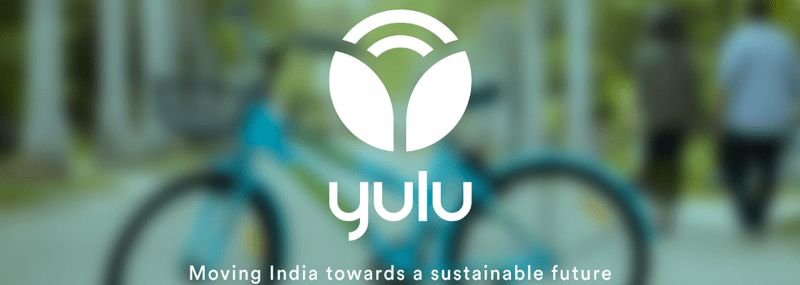

#***Business Case: Yulu - Hypothesis Testing***

--------------------------
**About : Yulu**

--------------------------

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

------------------
Business Problem

------------------

The Yulu wants to know:

* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* How well those variables describe the electric cycle demands


Yulu's wants an alytical report so that they can decide follwoing actions:
* Strategic Expansion: Entering in Indian market will be a strategic move to expand Yulu's global footprint. Team need analysis for demand factors understanding  to cater services in this new market and strategies accordingly.
* Revenue : Yulu's recent revenue decline is a pressing concern. Team wants to understand the factors affecting demand for shared electric cycles in the Indian market, so to make adjustments to regain profitability.

--------------------
**Dataset**

--------------------
Dataset Link:- https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

*Note:- any specfic annotation /infomation on dataset not higlighted*

*Column Profiling:*

    1 - datetime: datetime
    2 - season: season (1: spring, 2: summer, 3: fall, 4: winter)
    3 - holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
    4 - workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
    5 - weather:  1: Clear, Few clouds, partly cloudy, partly cloudy
                2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    6 - temp: temperature in Celsius
    7 - atemp: feeling temperature in Celsius
    8 - humidity: humidity
    9 - windspeed: wind speed
    10 - casual: count of casual users
    11 - registered: count of registered users
    12 - count: count of total rental bikes including both casual and registered

-------------------
**Concept Used:**

--------------
Recomendeed to use following:

* Bi-Variate Analysis
* 2-sample t-test: testing for difference across populations
* ANNOVA
* Chi-square

--------------
**Analysis Summary/Outline (Given)**

-------------
* Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
* Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)
* Select an appropriate test to check whether:
  - Working Day has effect on number of electric cycles rented
  - No. of cycles rented similar or different in different seasons
  - No. of cycles rented similar or different in different weather
  - Weather is dependent on season (check between 2 predictor variable)
* Set up Null Hypothesis (H0)
* State the alternate hypothesis (H1)
* Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
  - Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary
* Set a significance level (alpha)
* Calculate test Statistics.
* Decision to accept or reject null hypothesis.
* Inference from the analysis
-------------------------------------------------

In [ ]:
'''
MIT License

Copyright (c) 2024 Tushar Shrivastav

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.'''

In [ ]:
###############################################################################

#Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset

In [ ]:
#importing libaraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm,zscore,boxcox,probplot
from scipy.stats import ttest_ind,ttest_rel,ttest_1samp,mannwhitneyu
from scipy.stats import chisquare,chi2,chi2_contingency
from scipy.stats import f_oneway,kruskal,shapiro,levene,kstest
from scipy.stats import pearsonr,spearmanr
from statsmodels.stats import weightstats as wstests
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv

--2024-04-03 19:54:29--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.173, 108.157.172.183, 108.157.172.176, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv.1’

bike_sharing.csv.1  100%[===================>] 633.16K  --.-KB/s    in 0.08s   

2024-04-03 19:54:29 (7.29 MB/s) - ‘bike_sharing.csv.1’ saved [648353/648353]



In [ ]:
yu_data = pd.read_csv('bike_sharing.csv')

In [ ]:
yu_data.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

#General Exploratory Data Analysis


**Shape of Data**

In [ ]:
Row, Col = yu_data.shape
print('Data shape consist of:\n - Row:',Row, '\n - Columns:',Col )

Data shape consist of:
 - Row: 10886 
 - Columns: 12


**Datatype**

In [ ]:
# data
yu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Missing values and duplicate values**

In [ ]:
#missing values
yu_data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
#dulpicates in the data
print('Duplicate records: ',yu_data.duplicated().sum())

Duplicate records:  0


**Key Observations :**

* Total of 10886 rows/entries and 12 columns/fields/attributes in the data.
* The dataset does not contain any duplicates.
* Zero non null values/ No missing value.
* "**datetime**" has datatype "**object**" .
* **"season"**, **"holiday"**, **"workingday"**, **"weather"**, **"humidity"**, **"casual"**, **"registered"** and **"total_riders"** have datatype as "**int**" .
*  **"temp"**, **"atemp"**, and **"windspeed"** have datatype "**float**" .



------------------
Data Type Conversion
* The data type of datetime should be in datetime format.
* also some other field like season, holiday, workingday, weather should in object format as they are categorical in nature.
* The column profiling also suggest the same, however, before datatype conversion need to check the unique values.
-----------------------
**Checking unique values:**

In [ ]:
yu_data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

**Key Observation:**

* Unique value has showed the only season, holiday, workingday, weather can be converted to categorical datatype

---------------------

In [ ]:
#Converting the datetime to datetime datatype
yu_data['datetime'] = pd.to_datetime(yu_data['datetime'])
print('datatype:',yu_data.datetime.dtype)

datatype: datetime64[ns]


In [ ]:
#Converting the datatype to categorical
ca_cols= ['season', 'holiday', 'workingday', 'weather']
for col in ca_cols:
    yu_data[col] = yu_data[col].astype('category')

Categorical data type : https://pandas.pydata.org/docs/user_guide/categorical.html

In [ ]:
yu_data.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

Checking the time duration of the data

In [ ]:
print('Initial date :', yu_data['datetime'].min())
print('Last date :', yu_data['datetime'].max())
print('Data period:', yu_data['datetime'].max() - yu_data['datetime'].min())

Initial date : 2011-01-01 00:00:00
Last date : 2012-12-19 23:00:00
Data period: 718 days 23:00:00


For better exploratry anaylysis splitting date time to year, month, and hour columns

In [ ]:
yu_data['year'] = yu_data['datetime'].dt.year
yu_data['month'] = yu_data['datetime'].dt.month_name()
yu_data['day'] = yu_data['datetime'].dt.day
yu_data['wday'] = yu_data['datetime'].dt.day_name()
yu_data['hour'] = yu_data['datetime'].dt.hour
yu_data

datetime season holiday workingday weather   temp   atemp  \
0     2011-01-01 00:00:00      1       0          0       1   9.84  14.395   
1     2011-01-01 01:00:00      1       0          0       1   9.02  13.635   
2     2011-01-01 02:00:00      1       0          0       1   9.02  13.635   
3     2011-01-01 03:00:00      1       0          0       1   9.84  14.395   
4     2011-01-01 04:00:00      1       0          0       1   9.84  14.395   
...                   ...    ...     ...        ...     ...    ...     ...   
10881 2012-12-19 19:00:00      4       0          1       1  15.58  19.695   
10882 2012-12-19 20:00:00      4       0          1       1  14.76  17.425   
10883 2012-12-19 21:00:00      4       0          1       1  13.94  15.910   
10884 2012-12-19 22:00:00      4       0          1       1  13.94  17.425   
10885 2012-12-19 23:00:00      4       0          1       1  13.12  16.665   

       humidity  windspeed  casual  registered  count  year     month  day  \
0            81     0.0000       3          13     16  2011   January    1   
1            80     0.0000       8          32     40  2011   January    1   
2            80     0.0000       5          27     32  2011   January    1   
3            75     0.0000       3          10     13  2011   January    1   
4            75     0.0000       0           1      1  2011   January    1   
...         ...        ...     ...         ...    ...   ...       ...  ...   
10881        50    26.0027       7         329    336  2012  December   19   
10882        57    15.0013      10         231    241  2012  December   19   
10883        61    15.0013       4         164    168  2012  December   19   
10884        61     6.0032      12         117    129  2012  December   19   
10885        66     8.9981       4          84     88  2012  December   19   

            wday  hour  
0       Saturday     0  
1       Saturday     1  
2       Saturday     2  
3       Saturday     3  
4       Saturday     4  
...          ...   ...  
10881  Wednesday    19  
10882  Wednesday    20  
10883  Wednesday    21  
10884  Wednesday    22  
10885  Wednesday    23  

[10886 rows x 17 columns]

#*Basic Statistical Summary*

In [ ]:
#Characteristics of the data: Numerical field
yu_data.describe()

datetime         temp         atemp      humidity  \
count                          10886  10886.00000  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968     20.23086     23.655084     61.886460   
min              2011-01-01 00:00:00      0.82000      0.760000      0.000000   
25%              2011-07-02 07:15:00     13.94000     16.665000     47.000000   
50%              2012-01-01 20:30:00     20.50000     24.240000     62.000000   
75%              2012-07-01 12:45:00     26.24000     31.060000     77.000000   
max              2012-12-19 23:00:00     41.00000     45.455000    100.000000   
std                              NaN      7.79159      8.474601     19.245033   

          windspeed        casual    registered         count          year  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      12.799395     36.021955    155.552177    191.574132   2011.501929   
min        0.000000      0.000000      0.000000      1.000000   2011.000000   
25%        7.001500      4.000000     36.000000     42.000000   2011.000000   
50%       12.998000     17.000000    118.000000    145.000000   2012.000000   
75%       16.997900     49.000000    222.000000    284.000000   2012.000000   
max       56.996900    367.000000    886.000000    977.000000   2012.000000   
std        8.164537     49.960477    151.039033    181.144454      0.500019   

                day          hour  
count  10886.000000  10886.000000  
mean       9.992559     11.541613  
min        1.000000      0.000000  
25%        5.000000      6.000000  
50%       10.000000     12.000000  
75%       15.000000     18.000000  
max       19.000000     23.000000  
std        5.476608      6.915838

In [ ]:
#Characteristics of the data: Categorical field
yu_data.describe(include='category')

season  holiday  workingday  weather
count    10886    10886       10886    10886
unique       4        2           2        4
top          4        0           1        1
freq      2734    10575        7412     7192

In [ ]:
#Description of datetime type data in dataset
yu_data.describe(include="datetime")

datetime
count                          10886
mean   2011-12-27 05:56:22.399411968
min              2011-01-01 00:00:00
25%              2011-07-02 07:15:00
50%              2012-01-01 20:30:00
75%              2012-07-01 12:45:00
max              2012-12-19 23:00:00

**key Observation:**
* four seasons and four weather types in the dataset.
* Most data points occur in season 4 (winter) and weather type 1 (clear or cloudy). This suggests that consumers prefer renting bikes during winter on clear or cloudy days to enjoy the winter sun.
* Regarding the temperature, the data spans from 0.82 degrees Celsius to 41 degrees Celsius, with an average temperature of around 21.23 degrees Celsius.
* The felt temperature ranges from 0.76 degrees Celsius to 45.45 degrees Celsius, and the average felt temperature is recorded as 23.65 degrees Celsius.
* Humidity values vary between 0 and 100, with an average humidity level of ~61.9.
* Windspeed falls within the range of 0 to ~57, with an average windspeed of ~12.8.
* The count of rented bikes per day varies from 1 to 977, with an approximate average of 192 rentals.
* The number of casual riders is lower than that of registered riders. Casual riders range from 0 to 367, with an average of 36, while registered riders range from 0 to 886, with an average of 151 riders per day.
* The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.

Converting some other values for better understanding to categorical values

In [ ]:
yu_data['season']= yu_data['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
yu_data['holiday']= yu_data['holiday'].replace({0:'no', 1:'yes'})
yu_data['workingday']= yu_data['workingday'].replace({0:'no', 1:'yes'})
yu_data['weather']= yu_data['weather'].replace({1:'clear', 2:'partly_cloudy', 3:'rain', 4:'heavy_rain'})
print(yu_data['season'].unique())
print(yu_data['holiday'].unique())
print(yu_data['workingday'].unique())
print(yu_data['weather'].unique())

['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['spring', 'summer', 'fall', 'winter']
['no', 'yes']
Categories (2, object): ['no', 'yes']
['no', 'yes']
Categories (2, object): ['no', 'yes']
['clear', 'partly_cloudy', 'rain', 'heavy_rain']
Categories (4, object): ['clear', 'partly_cloudy', 'rain', 'heavy_rain']


# Univariate Analysis

In [ ]:
for col in yu_data.columns:
    if yu_data[col].dtype=='category':
      print(f"Summary of '{col}' column")
      print('-'*50)
      print(pd.DataFrame({col: yu_data[col].value_counts().index, 'Counts': yu_data[col].value_counts().values,'percentage': np.round(yu_data[col].value_counts(normalize =True)*100,2).values}))
      print()
      print('*'*50)

Summary of 'season' column
--------------------------------------------------
   season  Counts  percentage
0  winter    2734       25.11
1  summer    2733       25.11
2    fall    2733       25.11
3  spring    2686       24.67

**************************************************
Summary of 'holiday' column
--------------------------------------------------
  holiday  Counts  percentage
0      no   10575       97.14
1     yes     311        2.86

**************************************************
Summary of 'workingday' column
--------------------------------------------------
  workingday  Counts  percentage
0        yes    7412       68.09
1         no    3474       31.91

**************************************************
Summary of 'weather' column
--------------------------------------------------
         weather  Counts  percentage
0          clear    7192       66.07
1  partly_cloudy    2834       26.03
2           rain     859        7.89
3     heavy_rain       1        0.01

*

2 4


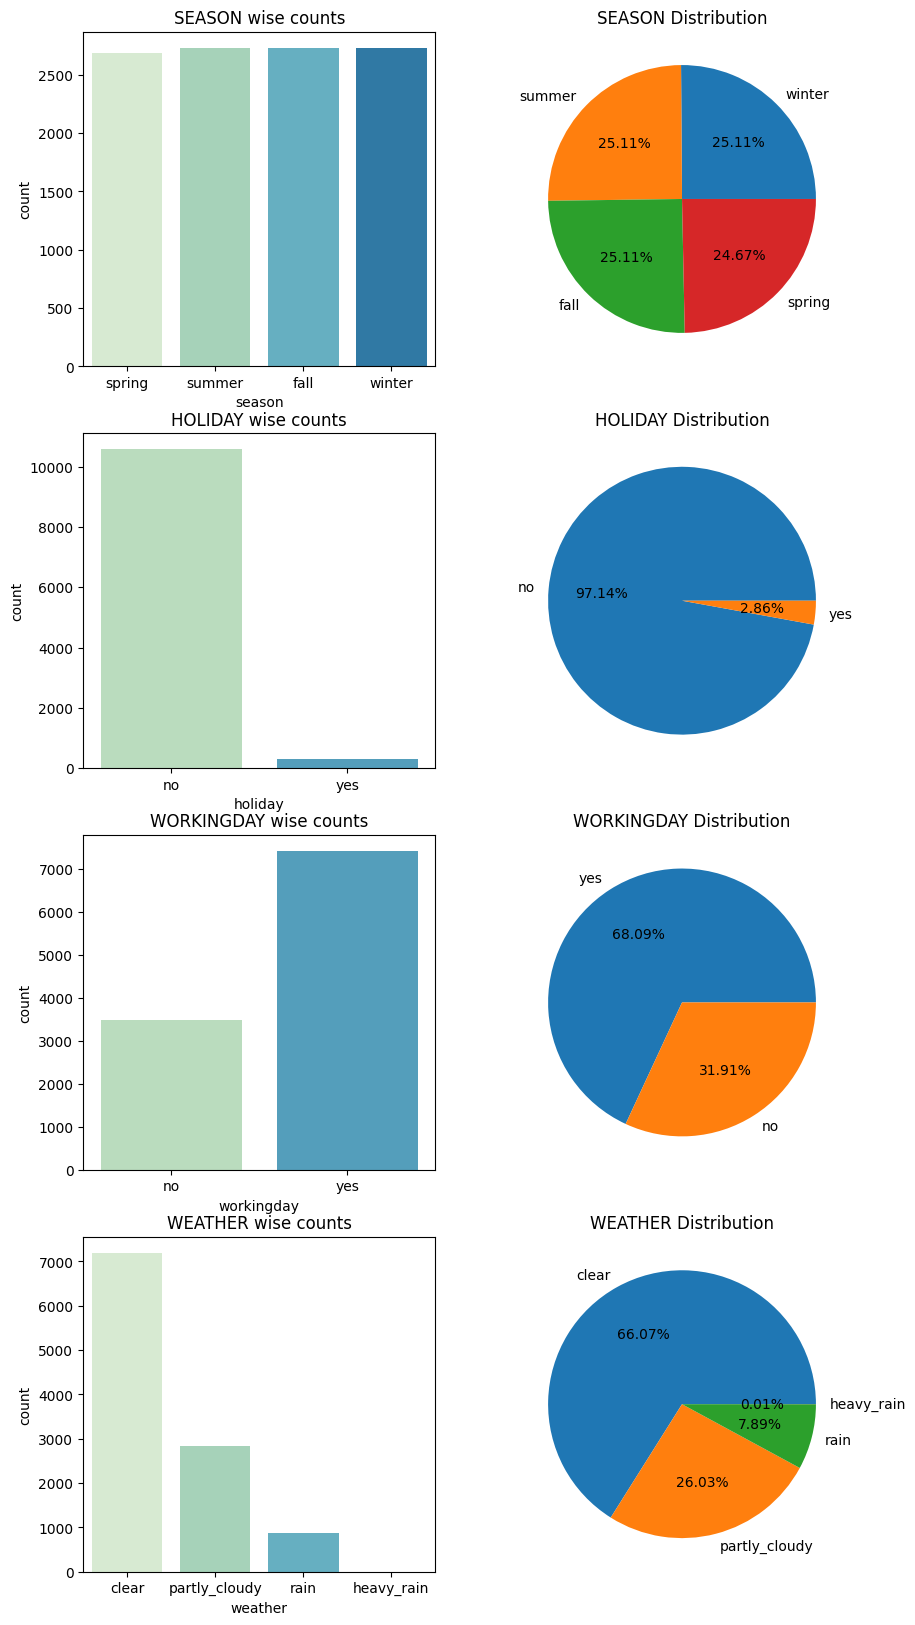

In [ ]:
a= (yu_data.dtypes == 'category').values.sum()
r_a = 2
r_b = a
print(r_a,r_b)
cou = 1
plt.figure(figsize=(10,20))
for col in yu_data.columns:
  if yu_data[col].dtype=='category':
        plt.subplot(r_b,r_a,cou)
        sns.countplot(data=yu_data, x=yu_data[col],palette='GnBu')
        plt.title(f'{col.upper()} wise counts')
        plt.subplot(r_b,r_a,cou+1)
        plt.title(f"{col.upper()} Distribution")
        plt.pie(x = yu_data[col].value_counts().values, labels = yu_data[col].value_counts().index, autopct = '%.2f%%')
        cou +=2

In [ ]:
for col in yu_data.columns:
    if col in ['year', 'month',  'wday', 'day','hour']:
      print(f"Summary of '{col}' column")
      print('-'*50)
      print(pd.DataFrame({col: yu_data[col].value_counts().index,
                          'Counts': yu_data[col].value_counts().values,
                          'percentage': np.round(yu_data[col].value_counts(normalize =True)*100,2).values}).sort_values(by=col, ignore_index=True))
      print()
      print('*'*50)

Summary of 'year' column
--------------------------------------------------
   year  Counts  percentage
0  2011    5422       49.81
1  2012    5464       50.19

**************************************************
Summary of 'month' column
--------------------------------------------------
        month  Counts  percentage
0       April     909        8.35
1      August     912        8.38
2    December     912        8.38
3    February     901        8.28
4     January     884        8.12
5        July     912        8.38
6        June     912        8.38
7       March     901        8.28
8         May     912        8.38
9    November     911        8.37
10    October     911        8.37
11  September     909        8.35

**************************************************
Summary of 'day' column
--------------------------------------------------
    day  Counts  percentage
0     1     575        5.28
1     2     573        5.26
2     3     573        5.26
3     4     574        5.27
4 

In [ ]:
a= len(['year', 'month',  'wday', 'day','hour'])
a

5

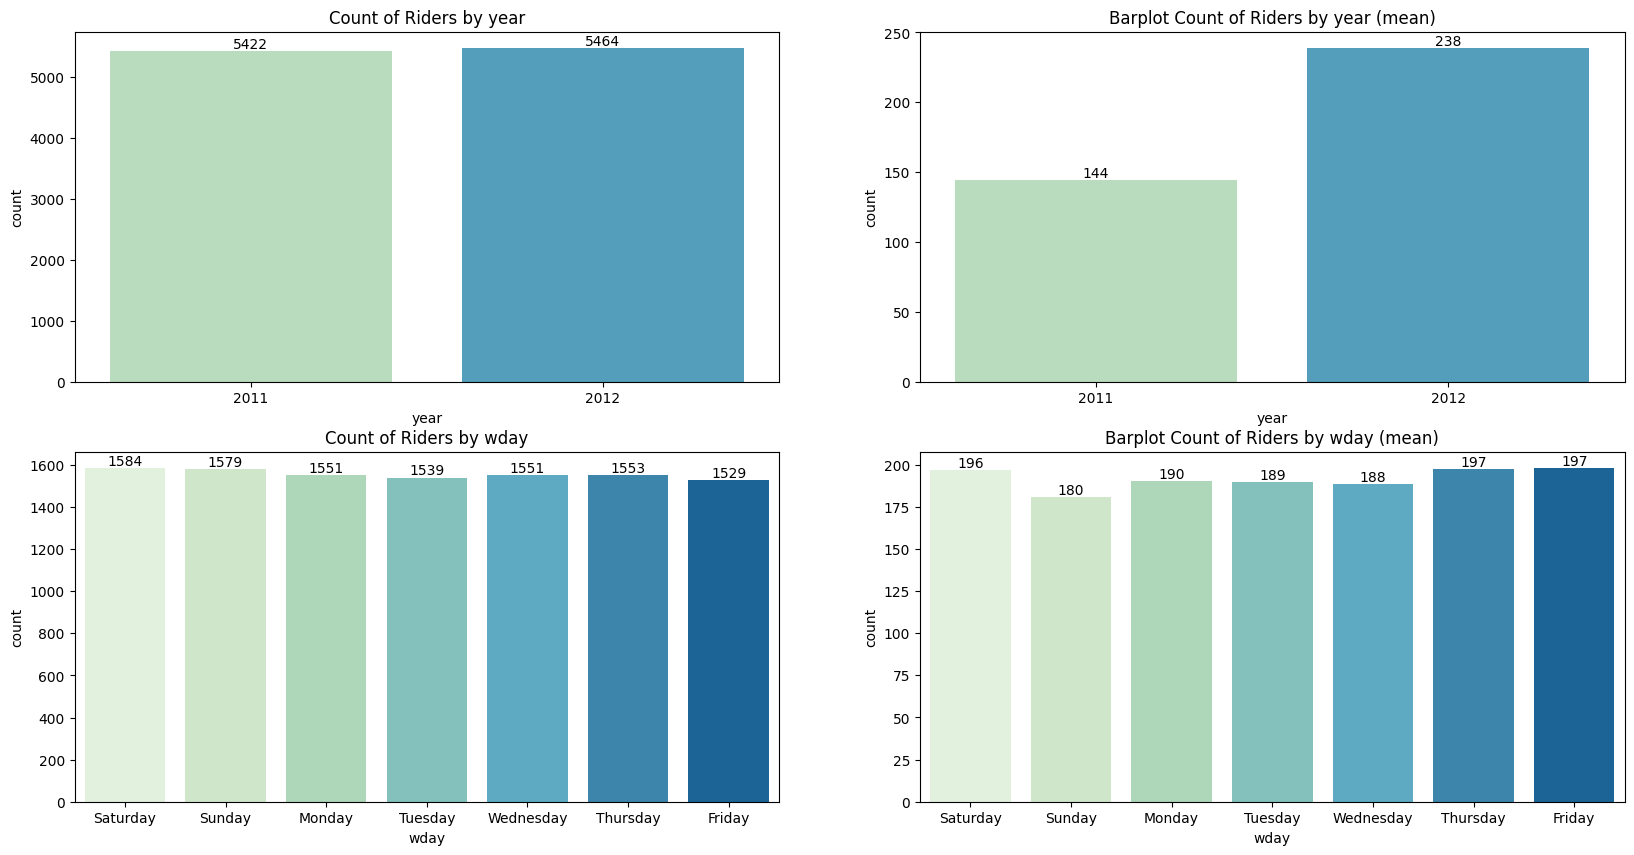

In [ ]:
col_n = ['year', 'wday']
r_a = 2
r_b = (int(len(col_n)/r_a) if len(col_n)%r_a==0 else int(len(col_n)/r_a)+1)*2;
plt.figure(figsize=(10*r_a,5*r_b))
cou = 1
for col in yu_data.columns:
    if col in col_n:
      plt.subplot(r_b,r_a,cou)
      plt.title('Count of Riders')
      axa = sns.countplot(data = yu_data, x = col,palette='GnBu')
      for ia in axa.containers:
        axa.bar_label(ia, fmt='%d')
      plt.title(f'Count of Riders by {col}')
      plt.subplot(r_b,r_a,cou+1)
      axb = sns.barplot(data = yu_data, x = col, y='count',palette='GnBu',ci=None)
      for ia in axb.containers:
        axb.bar_label(ia, fmt='%d')
      plt.title(f'Barplot Count of Riders by {col} (mean)')
      cou +=2


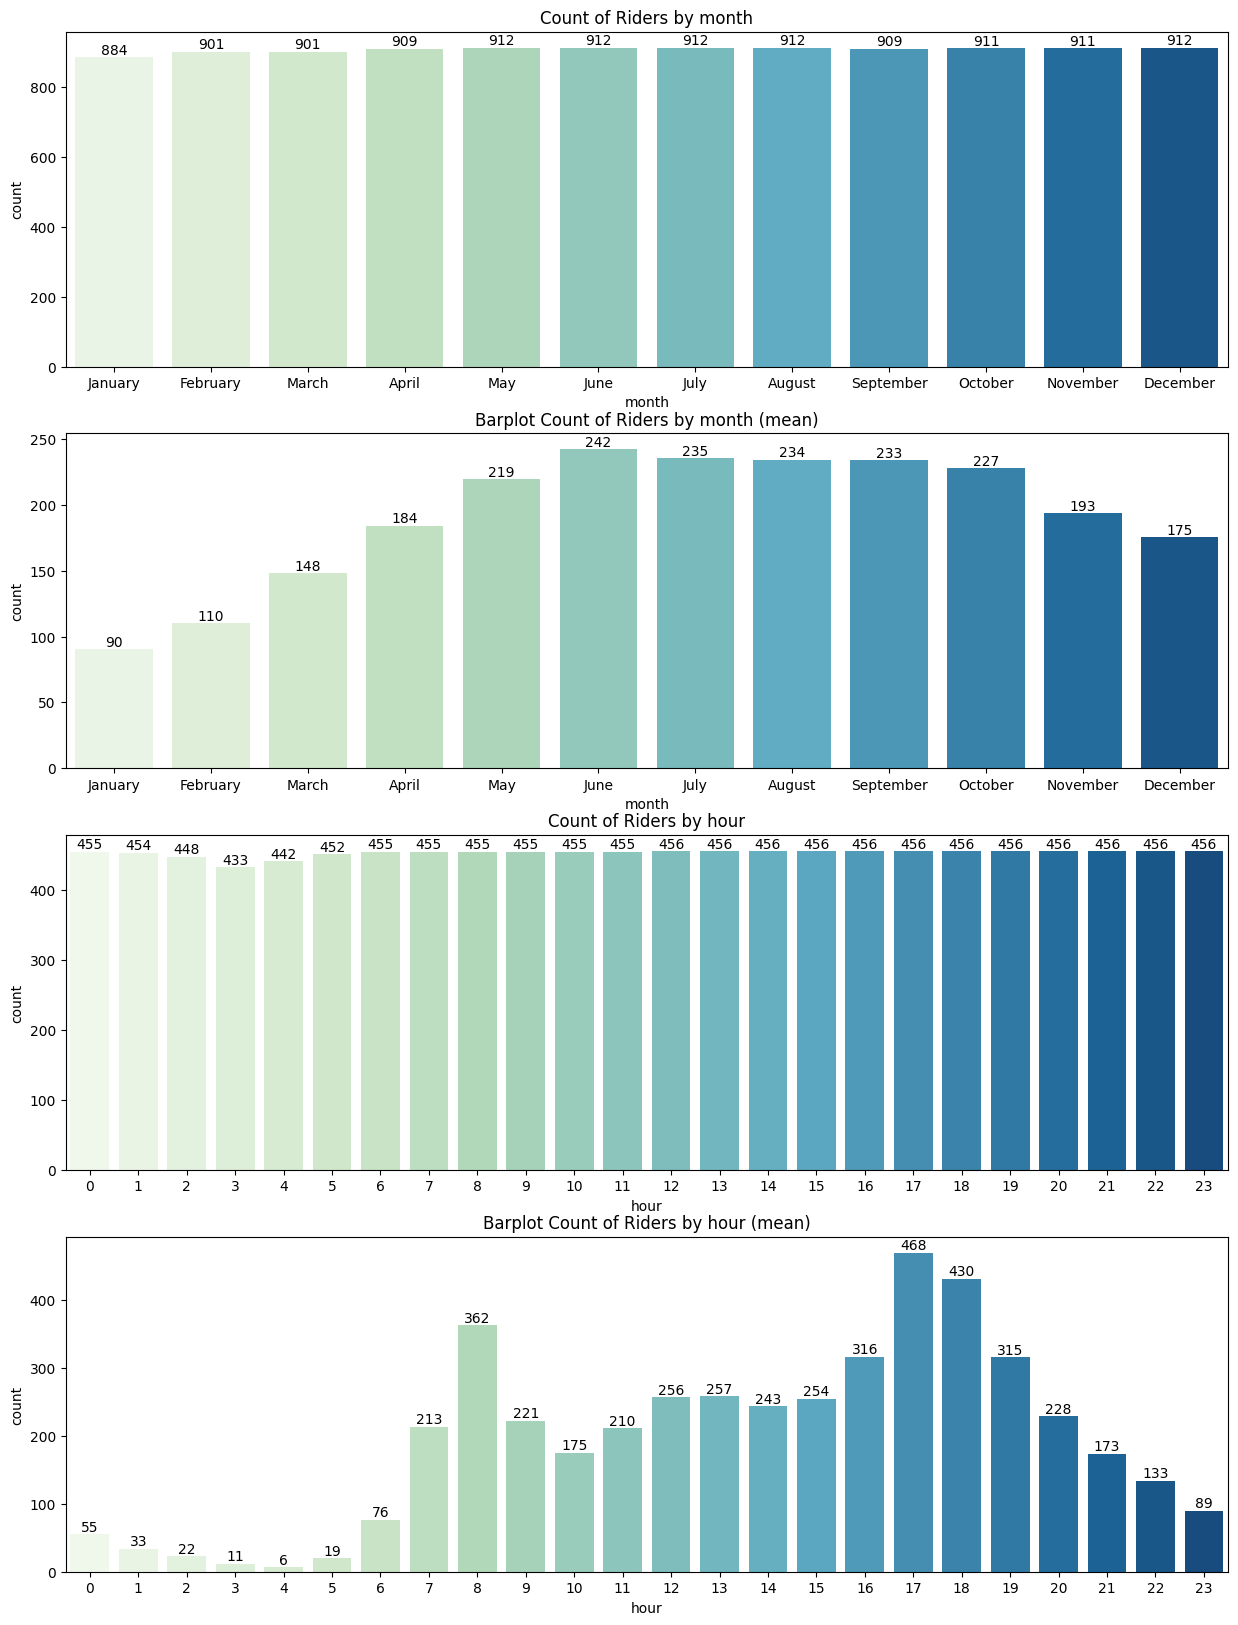

In [ ]:
col_n = ['month','hour']
r_a = 1
r_b = 2*(int(len(col_n)/r_a) if len(col_n)%r_a==0 else int(len(col_n)/r_a)+1);
plt.figure(figsize=(15*r_a,5*r_b))
cou = 1
for col in yu_data.columns:
    if col in col_n:
      plt.subplot(r_b,r_a,cou)
      plt.title('Count of Riders')
      axa = sns.countplot(data = yu_data, x = col, palette='GnBu')
      for ia in axa.containers:
        axa.bar_label(ia, fmt='%d')
      plt.title(f'Count of Riders by {col}')
      plt.subplot(r_b,r_a,cou+1)
      axb = sns.barplot(data = yu_data, x = col, y='count',palette='GnBu',ci=None)
      for ia in axb.containers:
        axb.bar_label(ia, fmt='%d')
      plt.title(f'Barplot Count of Riders by {col} (mean)')
      cou +=2


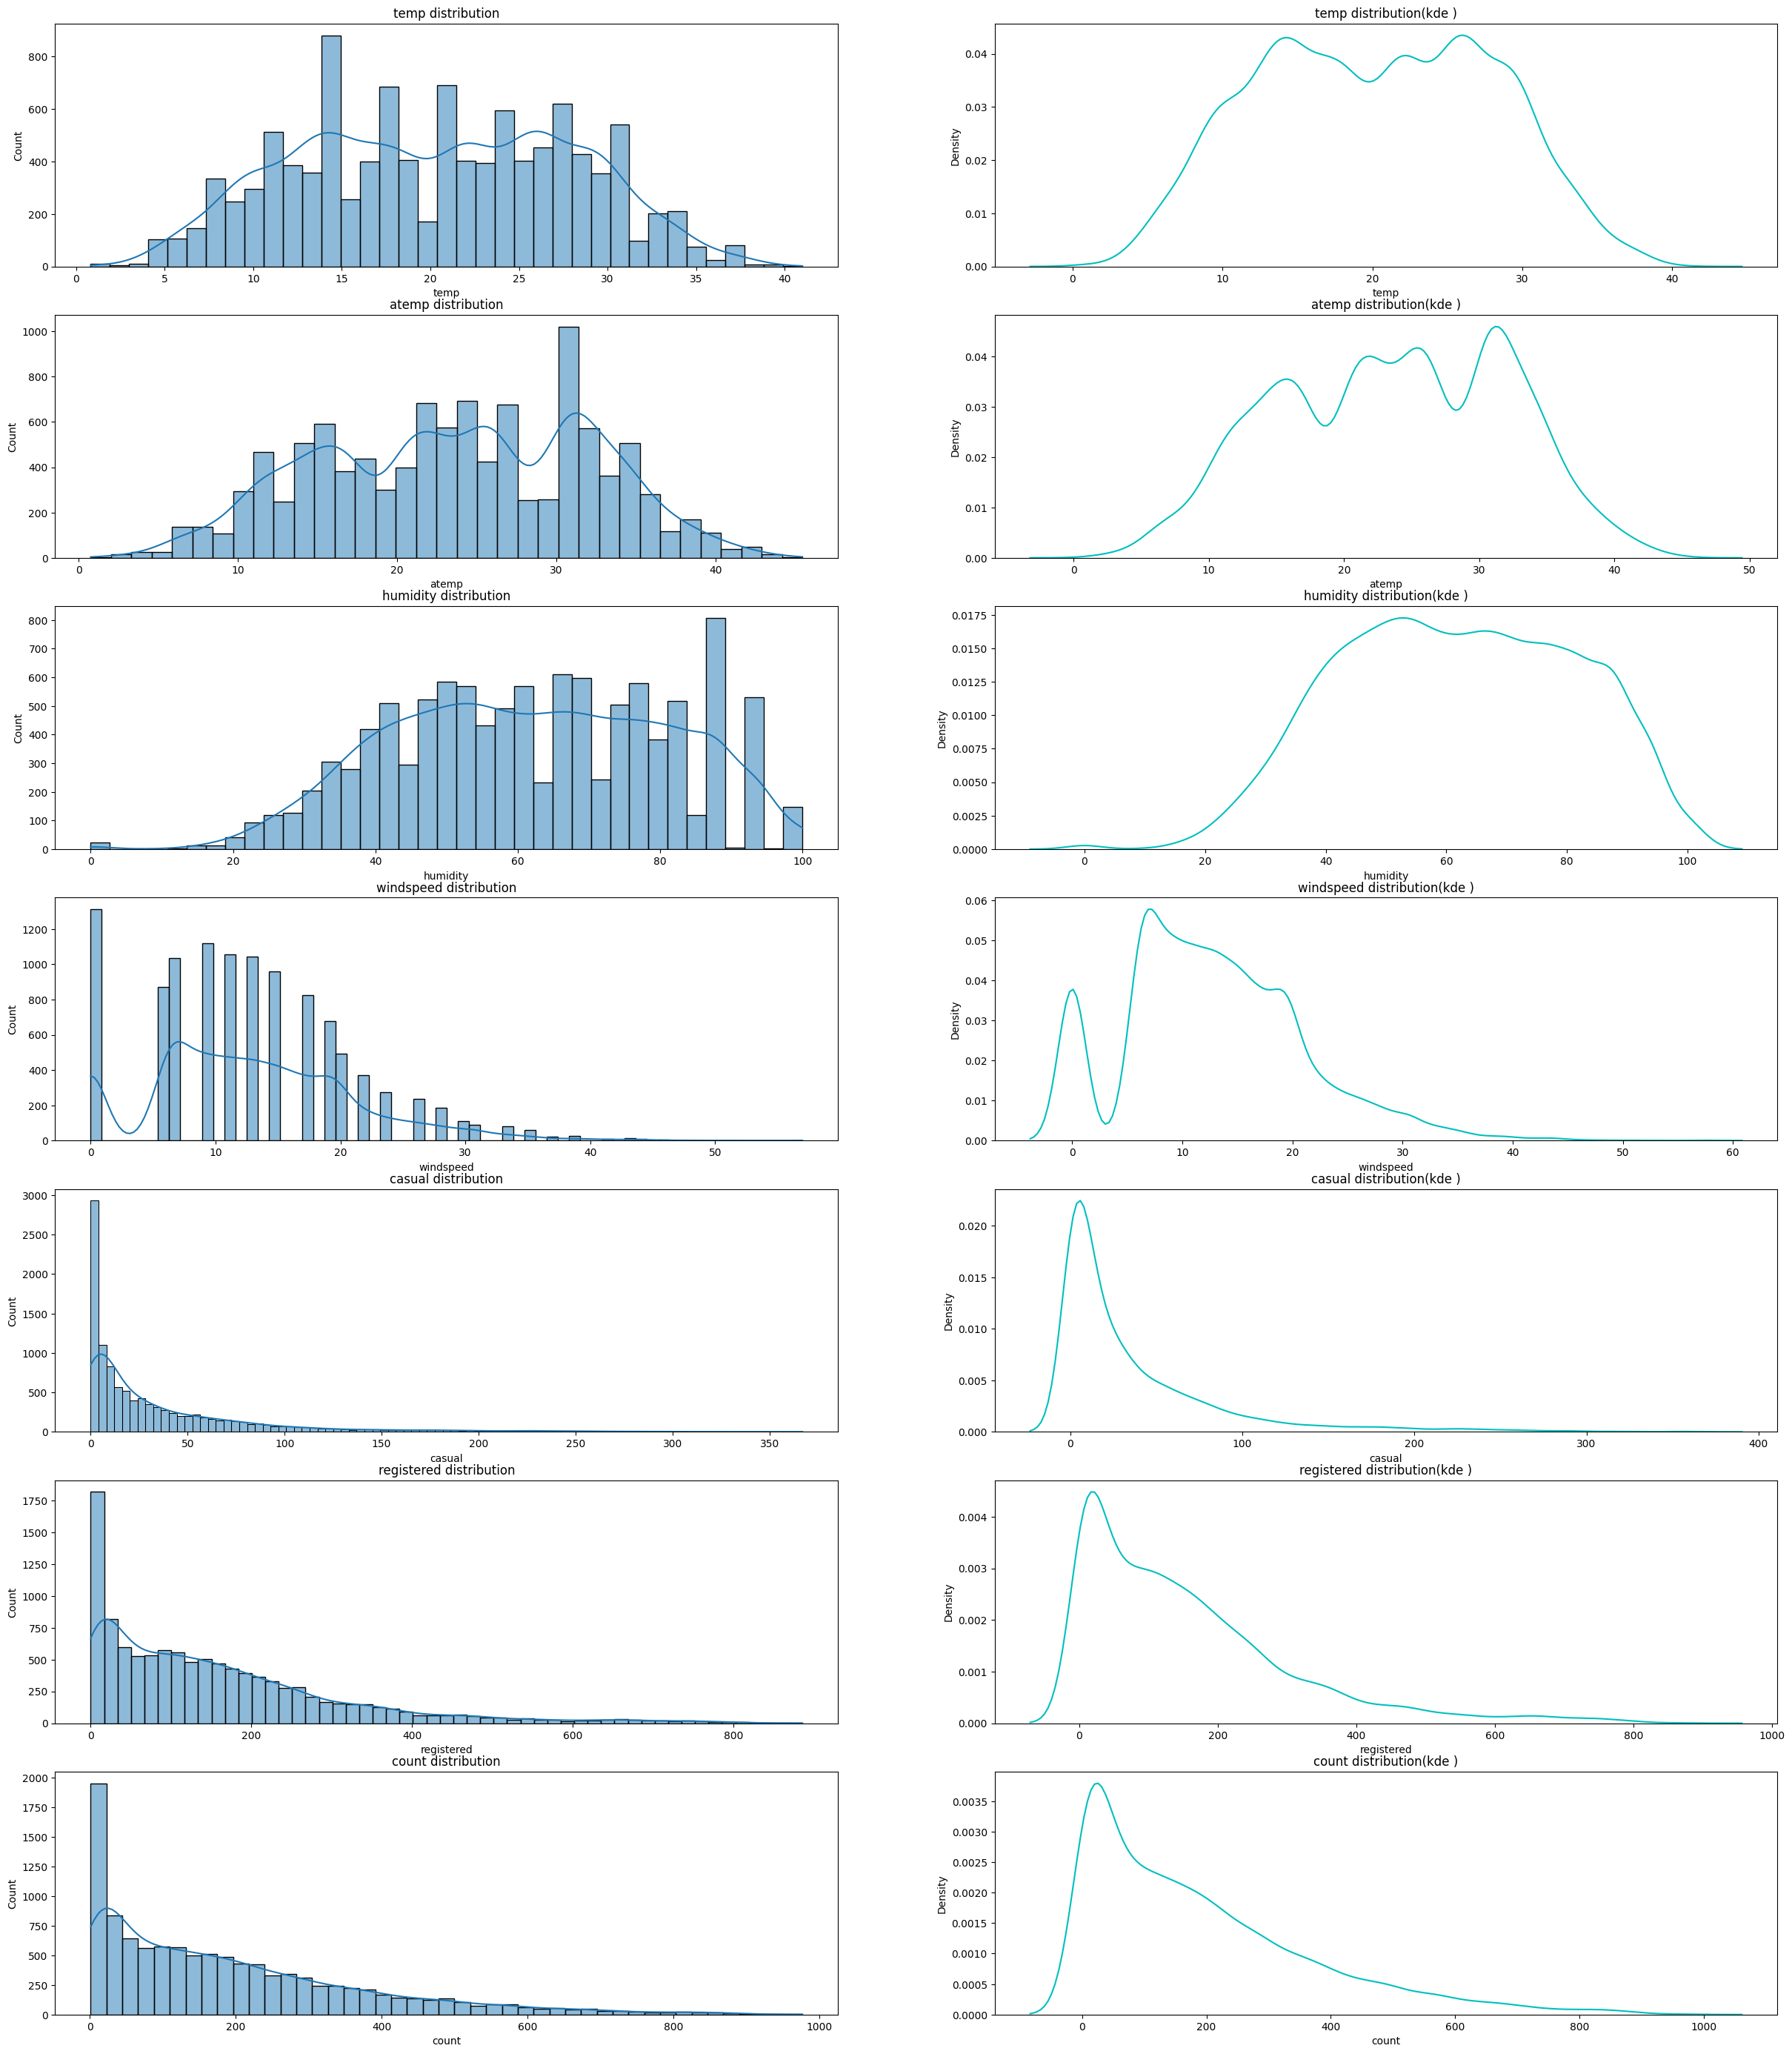

In [ ]:
col_n = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
r_a = 2
r_b = (int(len(col_n)/r_a) if len(col_n)%r_a==0 else int(len(col_n)/r_a)+1)*2;
plt.figure(figsize=(15*r_a,5*r_b))
cou = 1
for col in yu_data.columns:
    if col in col_n:
      plt.subplot(r_b,r_a,cou)
      plt.title('Count of Riders')
      sns.histplot(data = yu_data[col],kde=True)
      plt.title(f'{col} distribution')
      plt.subplot(r_b,r_a,cou+1)
      plt.title(f"{col} distribution(kde )")
      sns.kdeplot(data = yu_data,x=col,color='c')
      cou +=2
plt.show()


In [ ]:
# Registered vs Casual registered
yu_data[['casual','registered','count']].sum()
(yu_data[['casual','registered','count']].sum()/yu_data['count'].sum())*100

casual         18.803141
registered     81.196859
count         100.000000
dtype: float64

**Key Observation**
* We can see that the variables - Casual, Registered and Count are skewed to the right.
* 81% are registered riders and 19% are casual riders
* By looking at the distribution for windspeed, we can see that it follows a binomial distribution. Because there were days when there were 0 windspeed and on the other days there was low - moderate windspeed.
* The Temp, Atemp and Humidity follows (somewhat) a Normal distribution. Because most of their data points are centered around the mean however we will still try to test this hypothesis by using Shapiro.

**Box Plot**

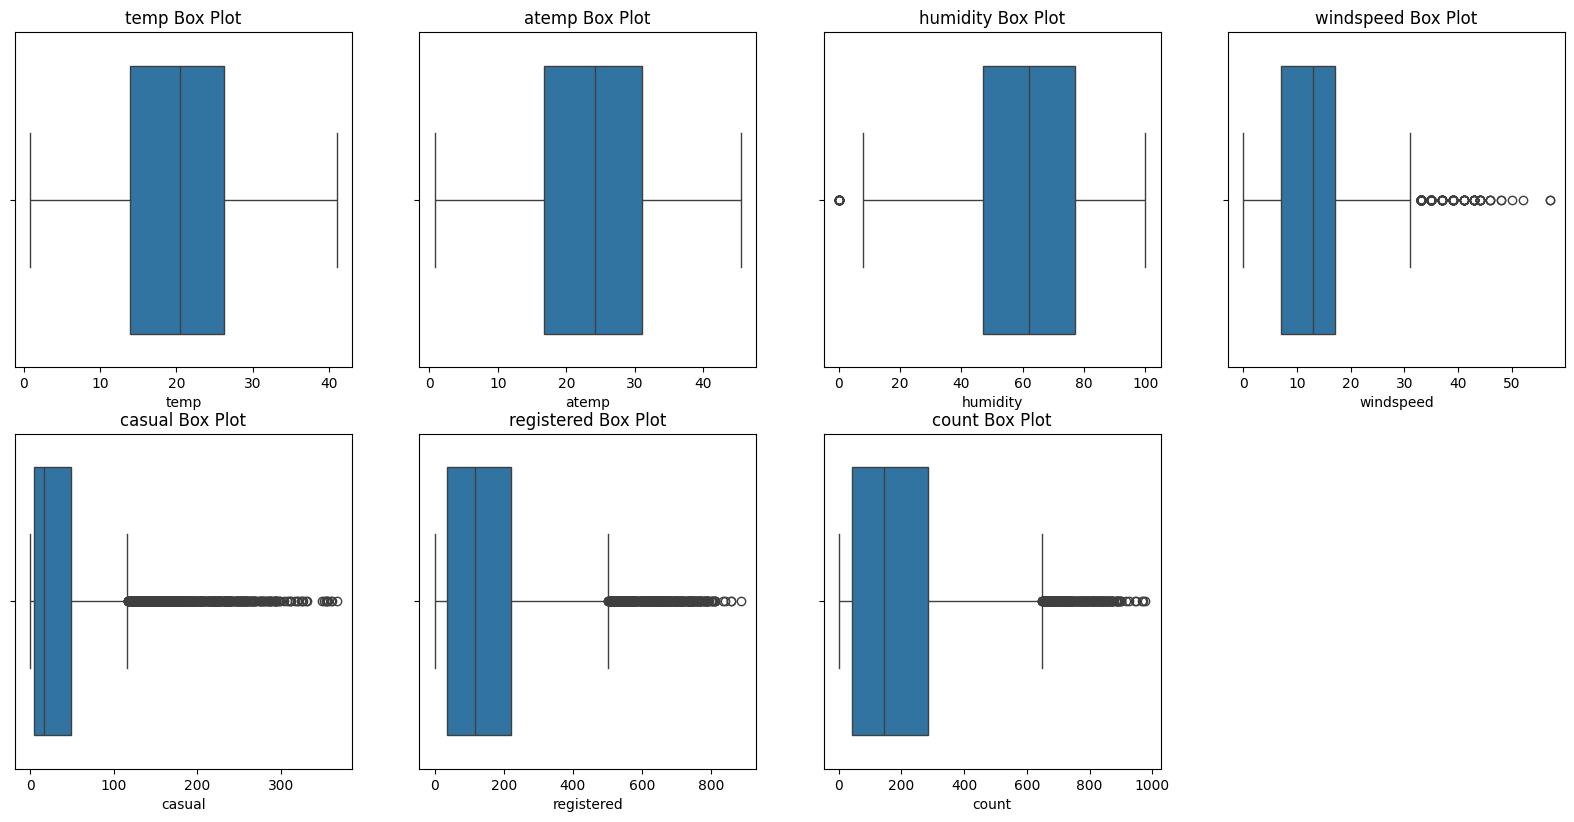

In [ ]:
col_n = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
r_a = 4
r_b = (int(len(col_n)/r_a) if len(col_n)%r_a==0 else int(len(col_n)/r_a)+1)*2;
plt.figure(figsize=(5*r_a,5*r_b))
cou = 1
for col in yu_data.columns:
    if col in col_n:
      plt.subplot(r_b,r_a,cou)
      sns.boxplot(data = yu_data,x=col)
      plt.title(f'{col} Box Plot')
      cou +=1
plt.show()

**Key Observation:**

From Boxplot, It seems outliers are present on humidity windspeed, casual, registered, count. And shows casual has more no. of outliers, whereas humidity has low number of outlire on minimum side.

#Bi-variate Analysis

We are Only Taking the Number of Rides i.e. COunt for Bi-variate Analysis

**Categorical Attributes**

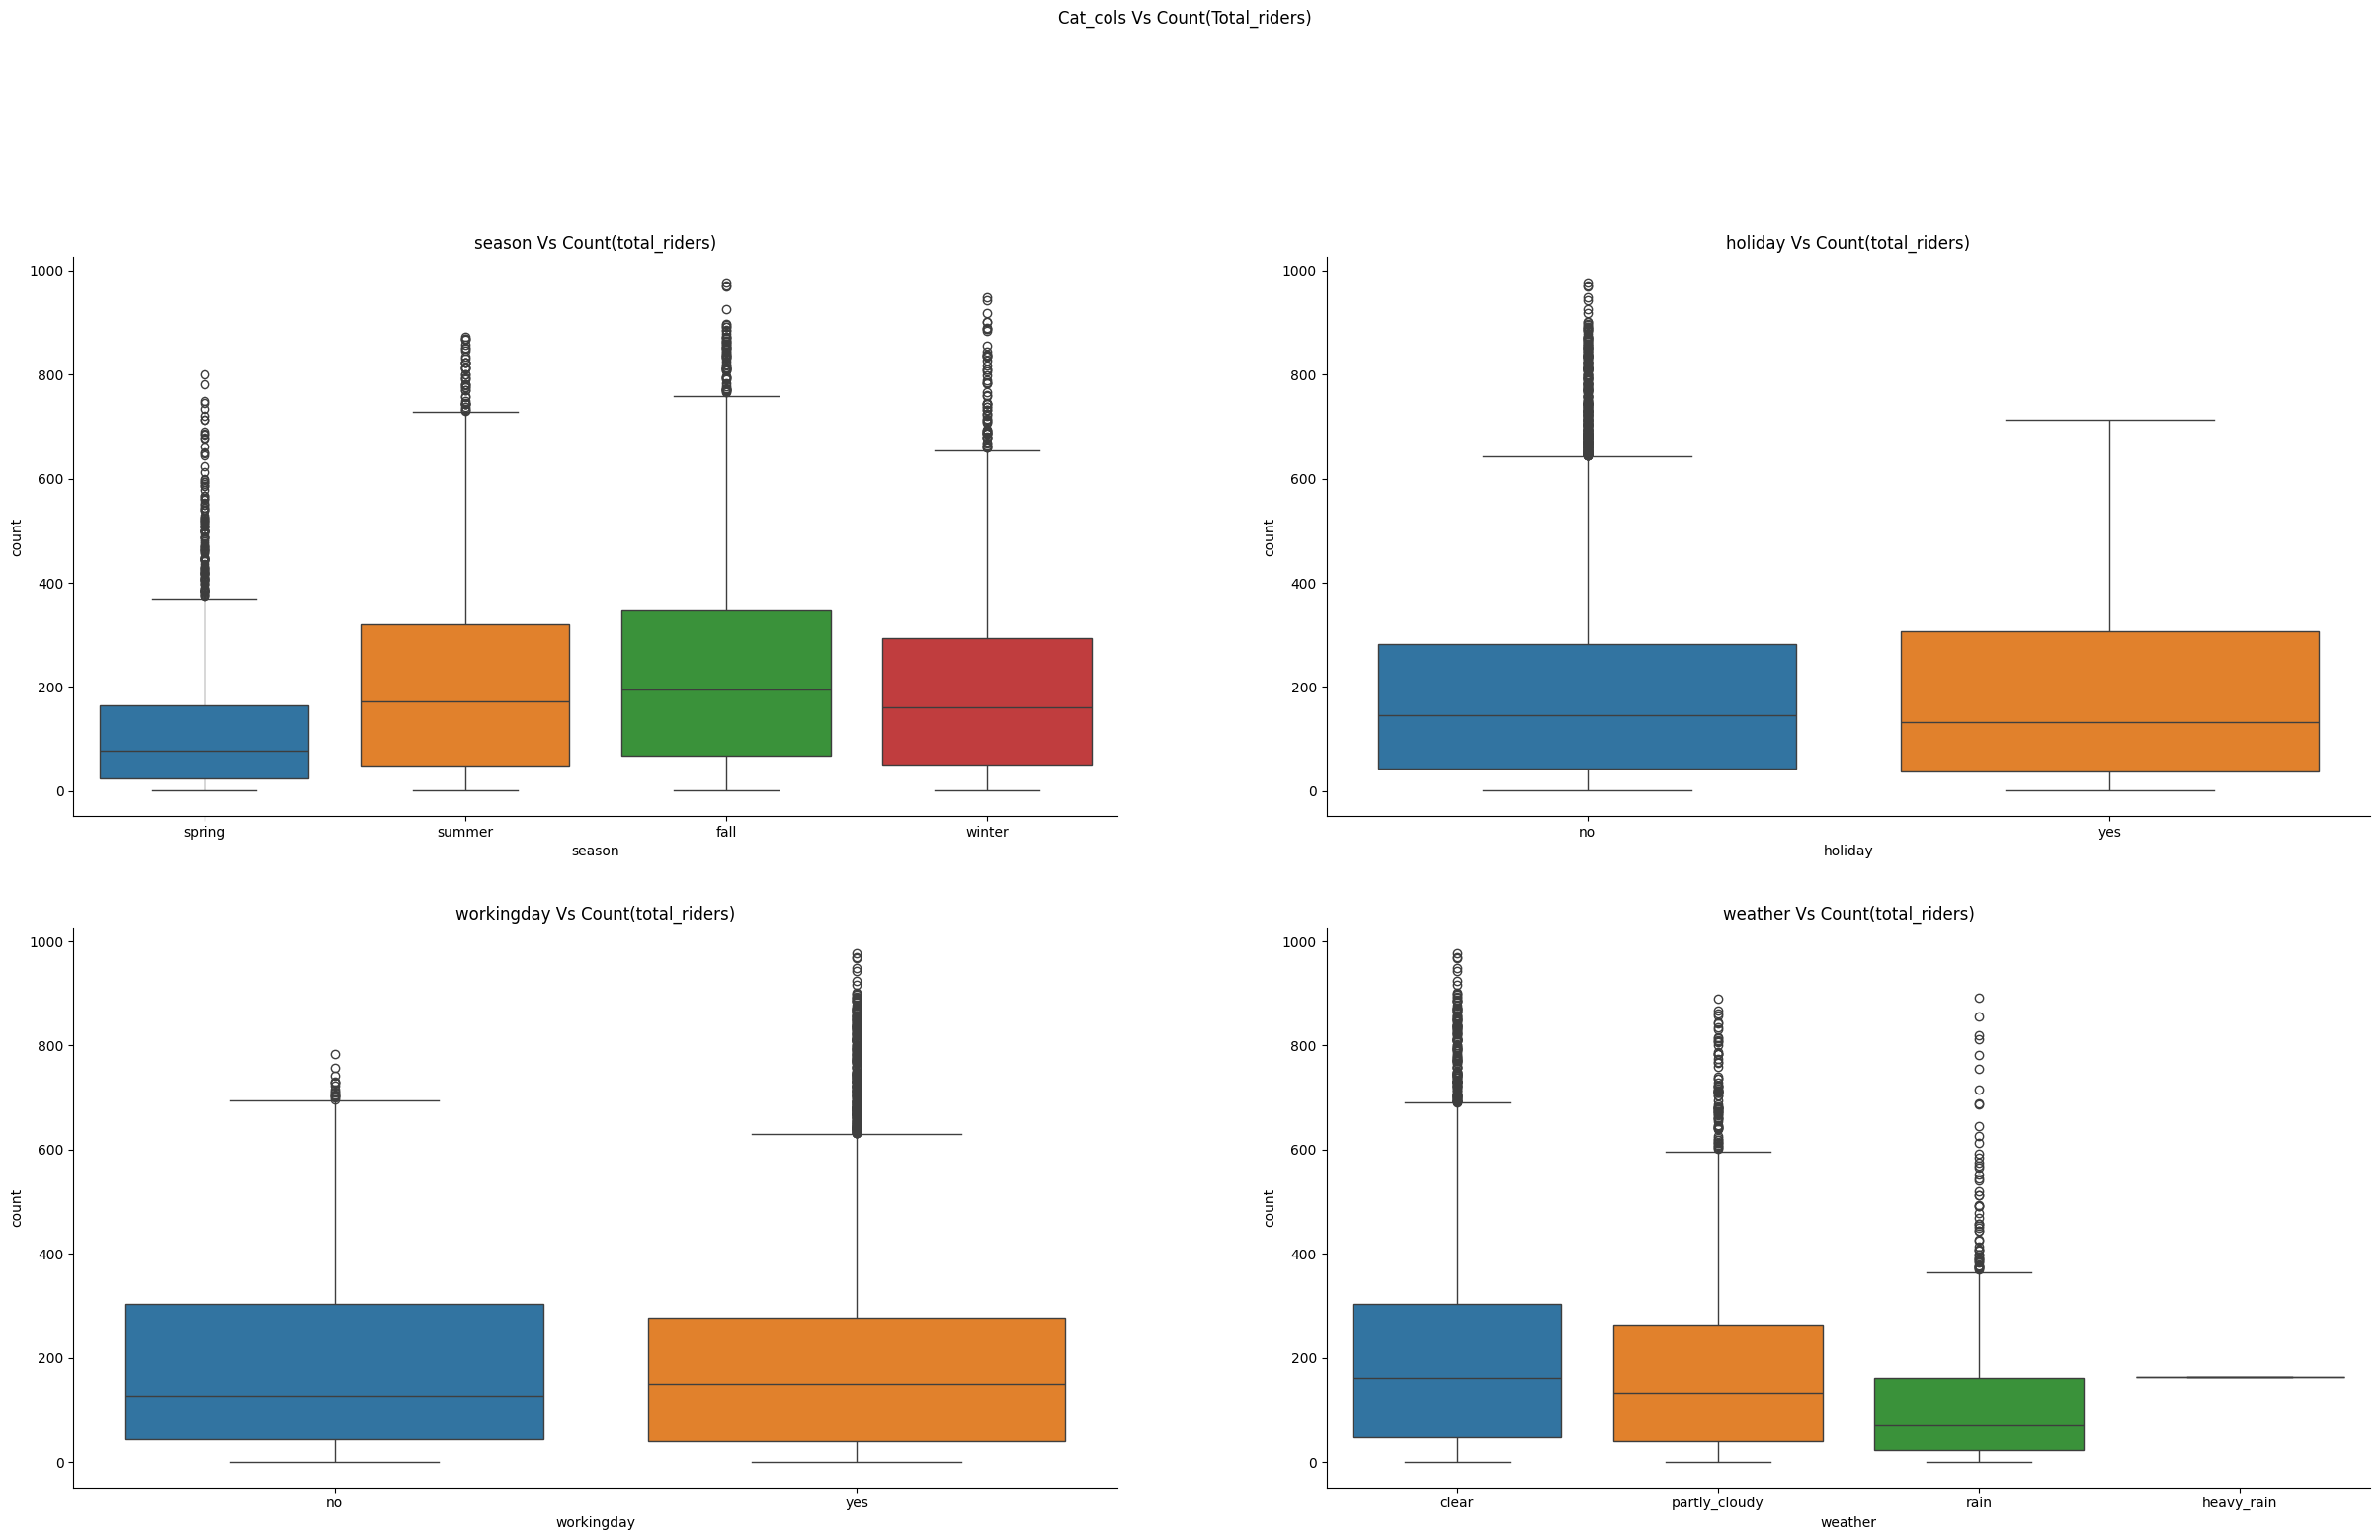

In [ ]:
cols_n = []
for col in yu_data.columns:
    if yu_data[col].dtype=='category':
        cols_n.append(col)

plt.figure(figsize = (30,25))
plt.suptitle(f'Cat_cols Vs Count(Total_riders)')
cou=1
for col in cols_n:
    plt.subplot(3,2,cou)
    sns.boxplot(data = yu_data, x = col, y='count', hue=col)
    sns.despine()
    plt.title(f'{col} Vs Count(total_riders)')
    cou+=1
plt.show()

del cols_n,col

**Seaon Based Analysis**

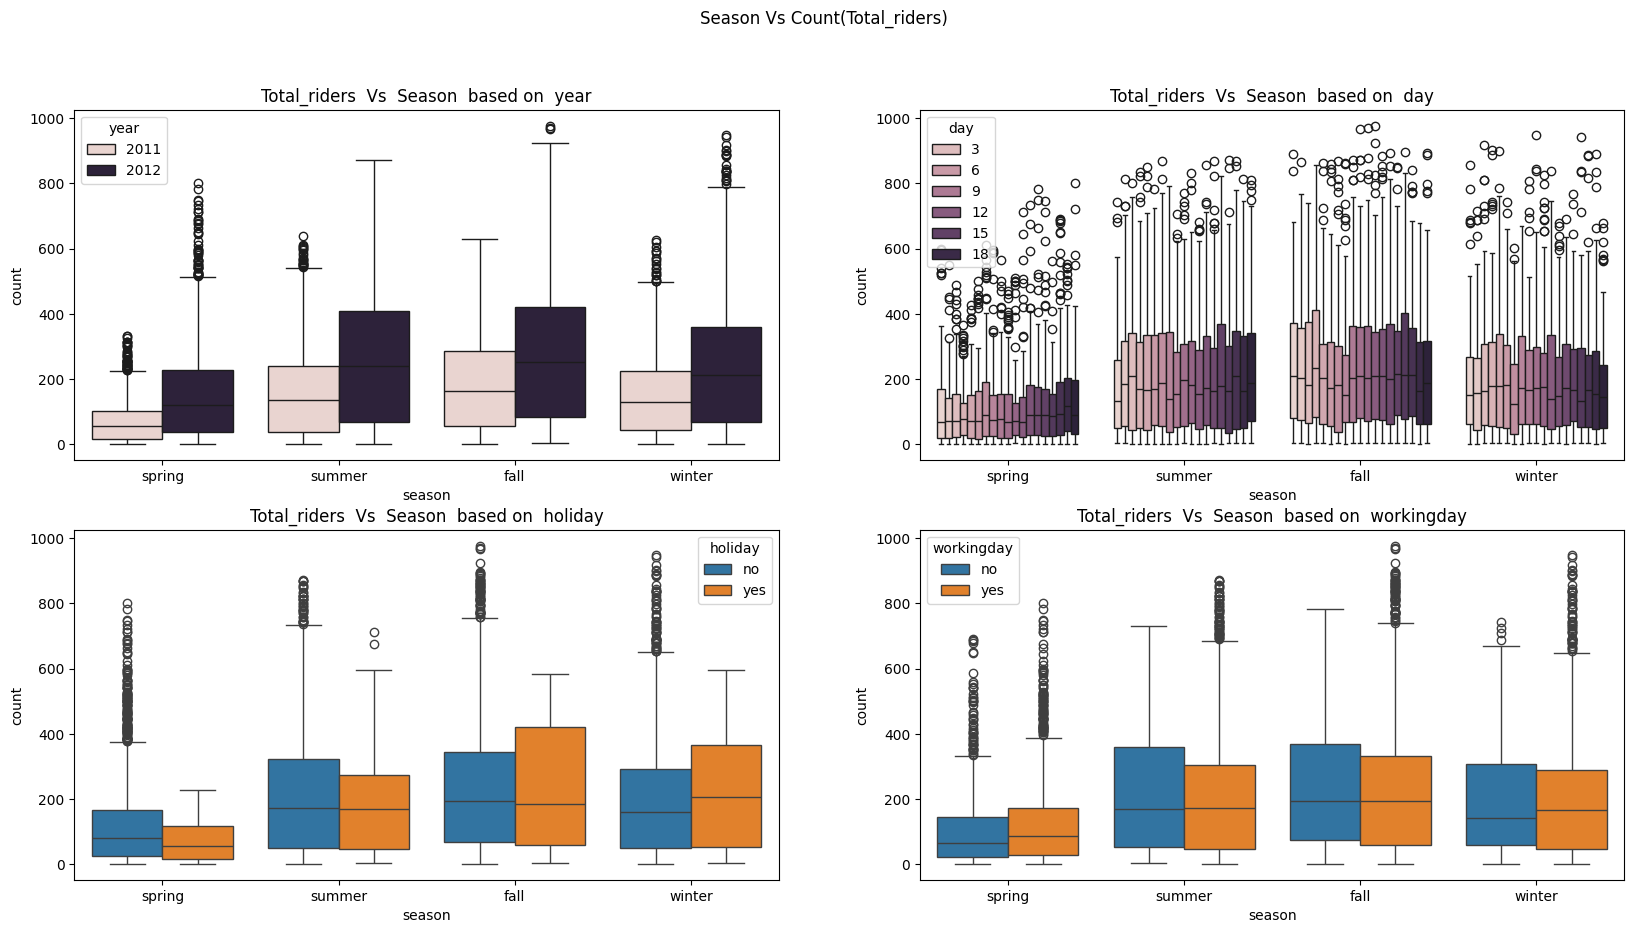

In [ ]:
cols_n = ['year','day','holiday','workingday']
plt.figure(figsize = (20,10))
plt.suptitle(f'Season Vs Count(Total_riders)')
cou=1
for col in cols_n:
    plt.subplot(2,2,cou)
    sns.boxplot(data = yu_data, x = 'season', y= 'count',hue = col)
    plt.title(f'Total_riders  Vs  Season  based on  {col}')
    cou+=1

----------------------
#Outliers Detection:

In [ ]:
col_n = ['humidity', 'windspeed', 'casual', 'registered','count']

for col in col_n:
  print(f"\nOutliers for {col}")
  print()
  Q1 = yu_data[col].quantile(0.25)
  Q2 = yu_data[col].median()
  Q3 = yu_data[col].quantile(0.75)
  IQR = Q3 - Q1
  Minl = Q1 - (1.5 * IQR)
  Maxl = Q3 + (1.5 * IQR)
  outls = yu_data[(yu_data[col] < Minl) | (yu_data[col] > Maxl)]
  outl_count = len(outls)
  perout = round(outl_count/len(yu_data[col])*100,2)
  print(f"Min Limit: {Minl.round(2)} \nQ1 : {Q1.round(2)}\nMedian : {Q2.round(2)}\nQ3 : {Q3.round(2)}\nIQR : {IQR.round(2)}\nMax Limit: {Maxl.round(2)}")
  print(f"Number of Outliers: {outl_count}")
  print(f"Percentage of Outliers: {perout} %")
  print("-"*50)
del col,col_n


Outliers for humidity

Min Limit: 2.0 
Q1 : 47.0
Median : 62.0
Q3 : 77.0
IQR : 30.0
Max Limit: 122.0
Number of Outliers: 22
Percentage of Outliers: 0.2 %
--------------------------------------------------

Outliers for windspeed

Min Limit: -7.99 
Q1 : 7.0
Median : 13.0
Q3 : 17.0
IQR : 10.0
Max Limit: 31.99
Number of Outliers: 227
Percentage of Outliers: 2.09 %
--------------------------------------------------

Outliers for casual

Min Limit: -63.5 
Q1 : 4.0
Median : 17.0
Q3 : 49.0
IQR : 45.0
Max Limit: 116.5
Number of Outliers: 749
Percentage of Outliers: 6.88 %
--------------------------------------------------

Outliers for registered

Min Limit: -243.0 
Q1 : 36.0
Median : 118.0
Q3 : 222.0
IQR : 186.0
Max Limit: 501.0
Number of Outliers: 423
Percentage of Outliers: 3.89 %
--------------------------------------------------

Outliers for count

Min Limit: -321.0 
Q1 : 42.0
Median : 145.0
Q3 : 284.0
IQR : 242.0
Max Limit: 647.0
Number of Outliers: 300
Percentage of Outliers: 2.76 %
-

**Key Observation**

* 22 outliers for humidity, which also at lower side, suggests that humidity dose not have significant effect.
* windspeed median (12.998) is closer to the lower quartile (Q1: 7.0015) than the upper quartile (Q3: 16.9979). There are 217 outliers for windspeed, which suggests that there are a significant number of instances where windspeed is much higher or lower than the typical values.
* casual median (16.0) is closer to the lower quartile (Q1: 4.0) than the upper quartile (Q3: 46.0). There are 743 outliers for casual riders

* There are 242 outliers for registered riders, suggesting that there are days with an unusually high or low number of registered riders.
* There are 77 outliers for the total count, indicating that some days experience an exceptionally high or low number of bike rentals

# Correlation
**Relationship between the Dependent and Independent Variables**

**Checking the skewness of the data**

In [ ]:
yu_data.skew(numeric_only = True)

temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
year         -0.007717
day           0.001182
hour         -0.009125
dtype: float64

**Key Observation:** Skewness Analysis of Variables

* Symmetrical Majority:
    - The majority of the variables, including 'season' and 'temp', exhibit skewness values close to zero, suggesting relatively symmetrical distributions.  
    
    
* Positive Skewness Insights:
    - Variables such as 'holiday', 'weather', 'windspeed', 'casual', 'registered', and 'count' demonstrate positive skewness, pointing to a concentration of lower values and a right skewed in their distributions.   

**Correlation Matrix & Heat Map**

temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.984948 -0.064949  -0.017852  0.467097    0.318571   
atemp       0.984948  1.000000 -0.043536  -0.057473  0.462067    0.314635   
humidity   -0.064949 -0.043536  1.000000  -0.318607 -0.348187   -0.265458   
windspeed  -0.017852 -0.057473 -0.318607   1.000000  0.092276    0.091052   
casual      0.467097  0.462067 -0.348187   0.092276  1.000000    0.497250   
registered  0.318571  0.314635 -0.265458   0.091052  0.497250    1.000000   
count       0.394454  0.389784 -0.317371   0.101369  0.690414    0.970948   
year        0.061226  0.058540 -0.078606  -0.015221  0.145241    0.264265   
day         0.015551  0.011866 -0.011335   0.036157  0.014109    0.019111   
hour        0.145430  0.140343 -0.278011   0.146631  0.302045    0.380540   

               count      year       day      hour  
temp        0.394454  0.061226  0.015551  0.145430  
atemp       0.389784  0.058540  0.011866  0.140343  
humidity   -0.317371 -0.078606 -0.011335 -0.278011  
windspeed   0.101369 -0.015221  0.036157  0.146631  
casual      0.690414  0.145241  0.014109  0.302045  
registered  0.970948  0.264265  0.019111  0.380540  
count       1.000000  0.260403  0.019826  0.400601  
year        0.260403  1.000000  0.001800 -0.004234  
day         0.019826  0.001800  1.000000  0.001132  
hour        0.400601 -0.004234  0.001132  1.000000

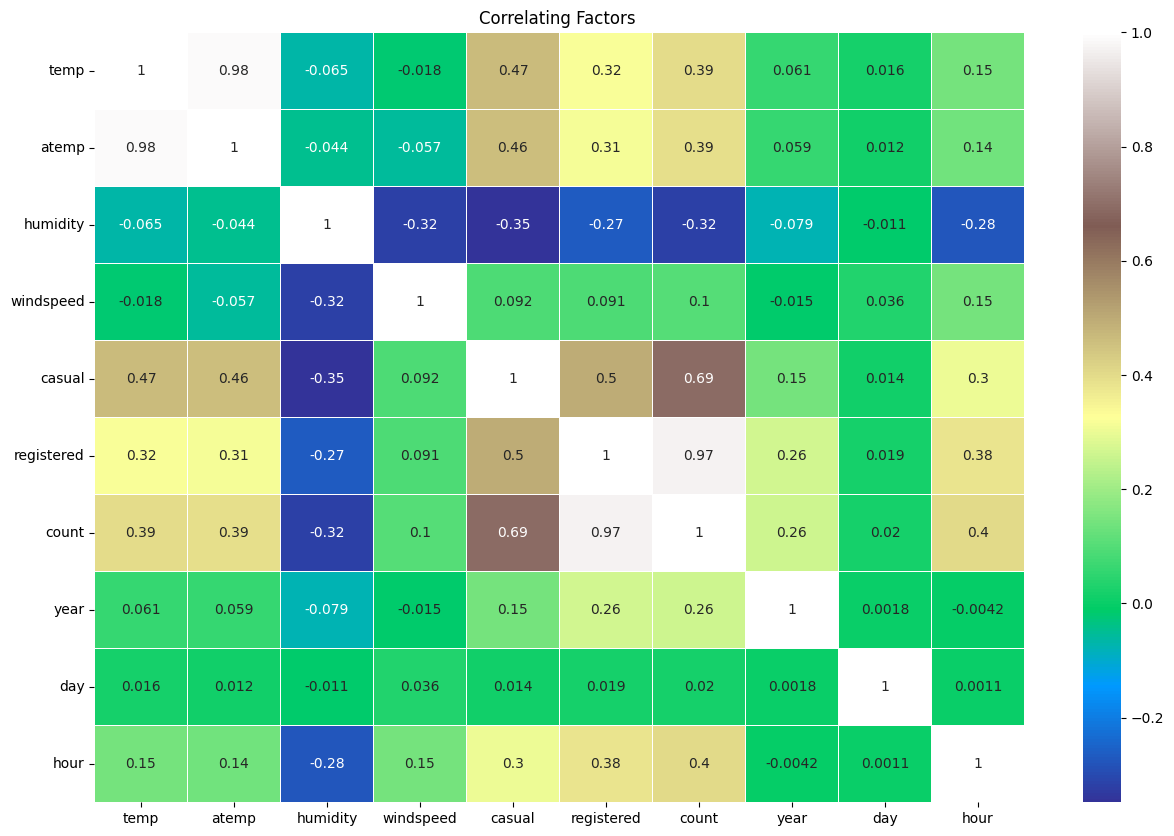

In [ ]:
corr_df =  yu_data.corr(numeric_only=True)
display(corr_df)
plt.figure(figsize=(15,10))
sns.heatmap(yu_data.corr(numeric_only=True), annot=True, linewidth=.5,cmap='terrain')
plt.yticks(rotation=0)
plt.title('Correlating Factors ')
plt.show()

-----
**Pair Plot**

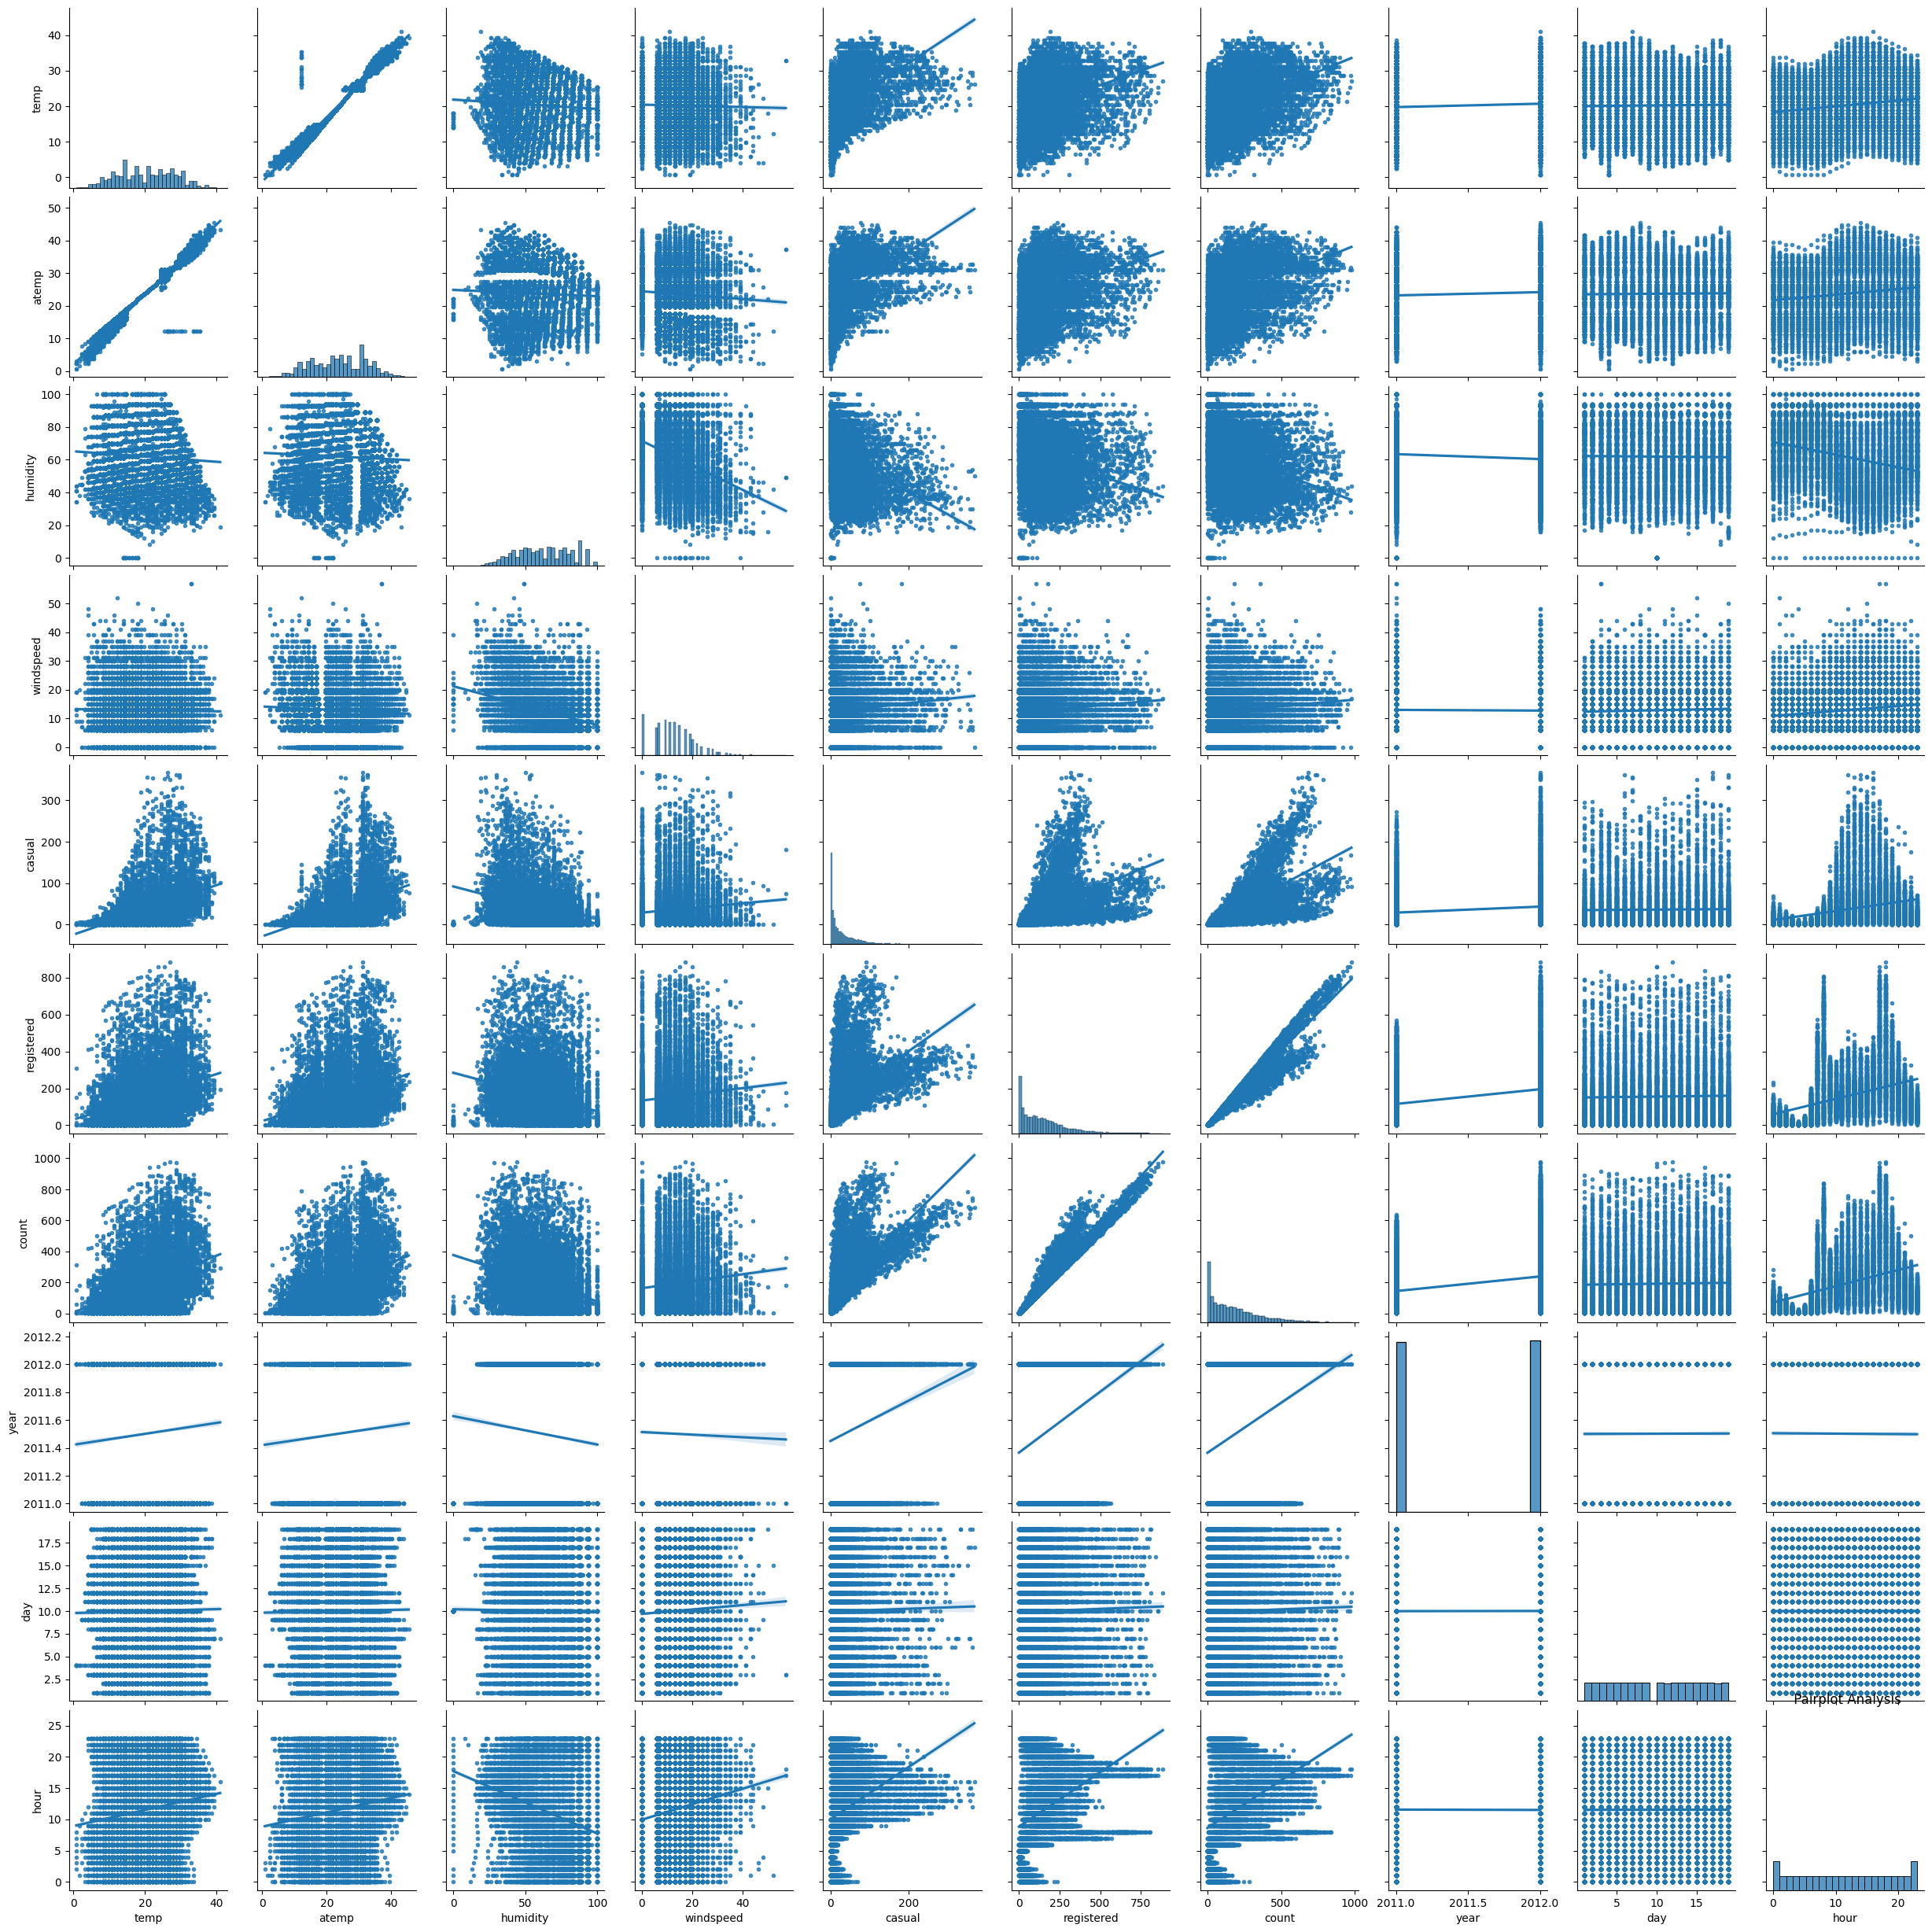

In [ ]:
sns.pairplot(data=yu_data,palette="GnBu",kind='reg',
             markers = '.')
plt.title(f' Pairplot Analysis')
plt.show()

------
**Checking Correlation:** Pearson and Spearman Coefficient

In [ ]:
# H0 Null Hypothesis: Two numeric columns are 'independent' of each other.
# Ha Alternate Hypothesis: Two numeric columns are 'dependent' on each other.

#    - The correration coefficient gives the strength of relationship.
#    - The range of spearman corrcoef is [-1,1].

#### Here's some of the datas are not normally distributed,So in order to capture the nonlinear properties, we will consider these spearman correlation.

In [ ]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
for col in num_cols:
    print(f'Testing Correlation between {col} and Count(Total_riders)')
    print()
    pc,p_val = pearsonr(yu_data[col],yu_data['count'])
    sc,p_val = spearmanr(yu_data[col],yu_data['count'])
    if sc>0 :
        if sc>0.5:
            print(f'Strong Positive correlation b/w {col} and Count (total_riders)- pearson-corrcoef- {round(pc,2)}')
            print(f'Strong Positive correlation b/w {col} and Count (total_riders)- spearman-corrcoef- {round(sc, 2)}')
        else:
            print(f'Weak Positive correlation b/w {col} and Count (total_riders)- pearson-corrcoef- {round(pc,2)}')
            print(f'Weak Positive correlation b/w {col} and Count (total_riders)- spearman-corrcoef- {round(sc,2)}')
    if sc == 0:
      print(f'No correlation b/w {col} and Count (total_riders)- pearson-corrcoef- {round(pc,2)}')
      print(f'No correlation b/w {col} and Count (total_riders)- spearman-corrcoef- {round(sc,2)}')
    if sc< 0:
        if sc<-0.5:
          print(f'Strong Negative correlation b/w {col} and Count (total_riders)- pearson-corrcoef- {round(pc,2)}')
          print(f'Strong Negative correlation b/w {col} and Count (total_riders)- spearman-corrcoef- {round(sc,2)}')
        else:
          print(f'Weak Negative correlation b/w {col} and Count (total_riders)- pearson-corrcoef- {round(pc,2)}')
          print(f'Weak Negative correlation b/w {col} and Count (total_riders)- spearman-corrcoef- {round(sc,2)}')
    print()
    print('-'*100)
    print()

Testing Correlation between temp and Count(Total_riders)

Weak Positive correlation b/w temp and Count (total_riders)- pearson-corrcoef- 0.39
Weak Positive correlation b/w temp and Count (total_riders)- spearman-corrcoef- 0.41

----------------------------------------------------------------------------------------------------

Testing Correlation between atemp and Count(Total_riders)

Weak Positive correlation b/w atemp and Count (total_riders)- pearson-corrcoef- 0.39
Weak Positive correlation b/w atemp and Count (total_riders)- spearman-corrcoef- 0.41

----------------------------------------------------------------------------------------------------

Testing Correlation between humidity and Count(Total_riders)

Weak Negative correlation b/w humidity and Count (total_riders)- pearson-corrcoef- -0.32
Weak Negative correlation b/w humidity and Count (total_riders)- spearman-corrcoef- -0.35

-----------------------------------------------------------------------------------------------

**Key Observation**
* It can be conclude that registered users contribute more towards count(total_riders) as there is a high correlation between them.
* It can be also see high correlation between temp and atemp features.
* The scatterplot confirms that there is a high correlation between registered customers and total yulu bike riders.

---------------------------

# **Hypothesis Testing**

* ## **Checking wether working Day has effect on number of electric cycles rented, i.e.on Weekdays and Weekends ?**

- STEP-1 : Set up Null Hypothesis
- STEP-2 : Checking for basic assumpitons for the hypothesis
- STEP-3: Test to perform.
- STEP-4: Compute the p-value and fix value of alpha.
- STEP-5: Compare p-value and alpha.

#### **STEP-1 : Set up Null Hypothesis**

In [ ]:
# H0 Null Hypothesis - No.of bikes rented on working days and non working days are same.
# H0: mu workingday  = mu non-workingday

# Ha Alternate Hypothesis - No.of bikes rented on working days and non working days are different.
# Ha: mu workingday != mu non-workingday

#### **STEP-2 : Checking for basic assumpitons for the hypothesis**

Normality checks

* Distribution check using QQ Plot

Confirmation by Shapiro-wilks Test

Homogeneity of Variances using Levene's test

* #### **Genral Normality by Distribution**

In [ ]:
yu_data.groupby('workingday')['count'].describe()

count        mean         std  min   25%    50%    75%    max
workingday                                                                
no          3474.0  188.506621  173.724015  1.0  44.0  128.0  304.0  783.0
yes         7412.0  193.011873  184.513659  1.0  41.0  151.0  277.0  977.0

In [ ]:
workingday_Yes = yu_data[yu_data['workingday']== 'yes']['count']
workingday_No = yu_data[yu_data['workingday']== 'no']['count']

* #### **Histogram**

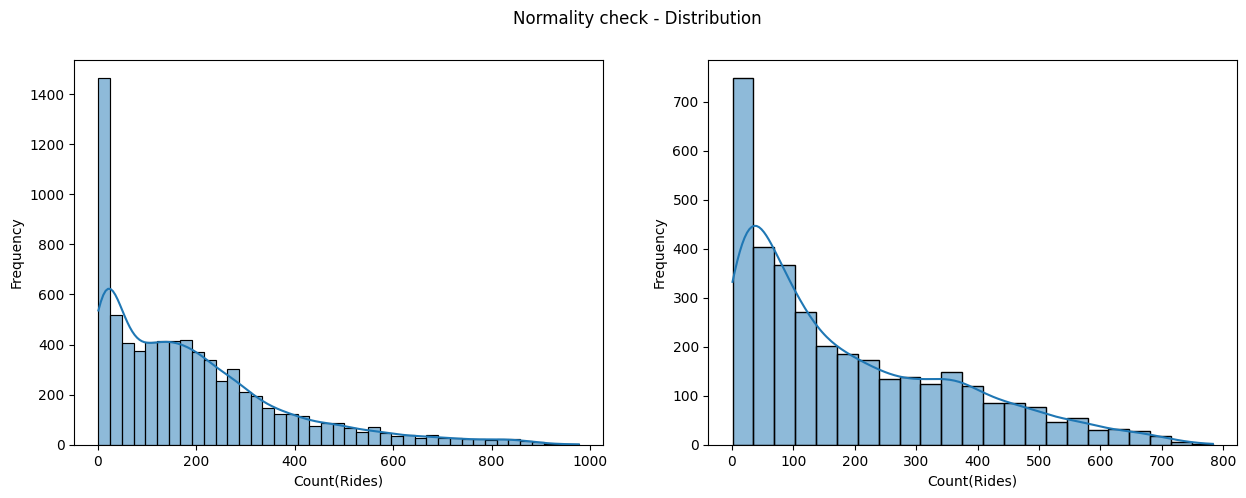

In [ ]:
plt.figure(figsize = (15, 5))
plt.suptitle("Normality check - Distribution")
plt.subplot(1,2,1)
sns.histplot(workingday_Yes, kde = True, label = 'workingday')
plt.ylabel('Frequency')
plt.xlabel('Count(Rides)')

plt.subplot(1,2,2)
sns.histplot(workingday_No, kde = True, label = 'non_workingday')
plt.ylabel('Frequency')
plt.xlabel('Count(Rides)')
plt.show()

* #### **QQ Plot**

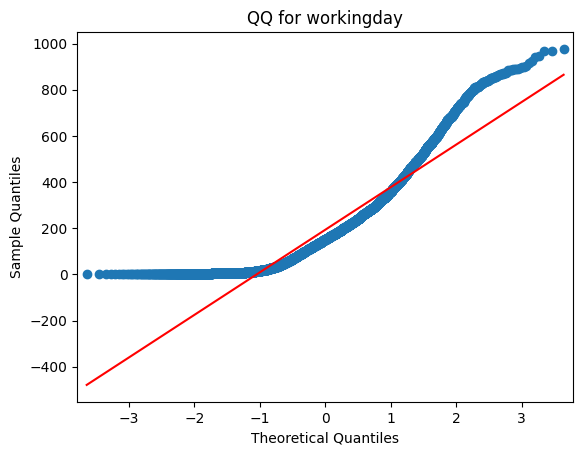

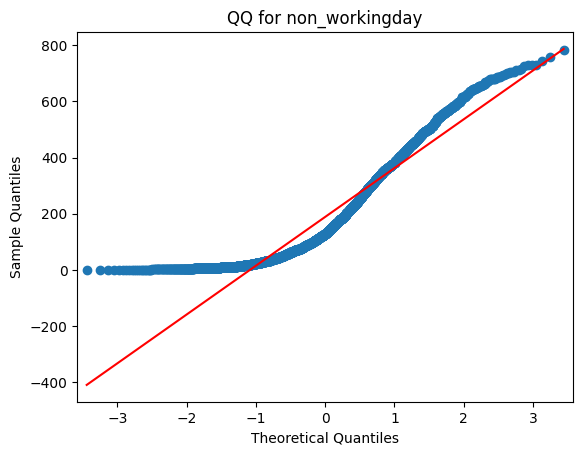

In [ ]:
sm.qqplot(workingday_Yes,line='s')
plt.title('QQ for workingday')

sm.qqplot(workingday_No, line = 's')
plt.title('QQ for non_workingday')
plt.show()


* ####  **Shapiro-wilks Test**

In [ ]:
# H0 Null Hypothesis - Data is normaly distributed
# Ha Alternate Hypothesis - Data is not normaly distributed

In [ ]:
# Working Days

shap_stat , p_val = shapiro(workingday_Yes)
print(f"shapiro_stat : {shap_stat}")
print(f"p-value : {p_val}")
print()
if p_val < 0.05:
    print('Reject H0: Data does not follow normal distribution')
else:
    print('Fail to reject H0: Data follows a normal distribution')

shapiro_stat : 0.8702582120895386
p-value : 0.0

Reject H0: Data does not follow normal distribution


In [ ]:
# Non Working Days

shap_stat , p_val = shapiro(workingday_No)
print(f"shapiro_stat : {shap_stat}")
print(f"p-value : {p_val}")
print()
if p_val < 0.05:
    print('Reject H0: Data does not follow normal distribution')
else:
    print('Fail to reject H0: Data follows a normal distribution')

shapiro_stat : 0.8852126598358154
p-value : 4.203895392974451e-45

Reject H0: Data does not follow normal distribution


* #### **Levene test for variance**


In [ ]:
# H0 Null Hypothesis - Both Datas has similar variance

# Ha Alternate Hypothesis- Both Datas has different variance

In [ ]:
lev_stat, p_value = levene(workingday_Yes,workingday_No)

print('Levene_stat : ', lev_stat)
print('p-value : ', p_value)
print()
if p_value < 0.05:
    print('Reject H0: The samples have different variance')
else:
    print('Fail to reject H0: The samples have similar variance')

Levene_stat :  0.004972848886504472
p-value :  0.9437823280916695

Fail to reject H0: The samples have similar variance


Assumptions of T-Test

- The sample size should be less than 30.
- Data is normally distributed  
- Similar Variance


Since the samples are not normally distributed,
2 Smaple T-Test cannot be applied here,
we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

Source: https://libguides.library.kent.edu/SPSS/IndependentTTest

Page 38 : https://www.sagepub.com/sites/default/files/upm-binaries/40287_Chapter9.pdf

#### Trying to compare the test with 2 Sample T test

####**STEP-3: Test to perform.**

  * Two tailed t-test for indpependent variables and Mann-Whitney U rank test as mentioed above

####**STEP-4: Compute the p-value and fix value of alpha.**

  * Applying the 2 Sample T test and Mann-Whitney U rank test value using the ttest function using scipy.stats.
  * Setting Alpha = 0.05 (i.e) Confidence Level = 95%

#### **STEP-5: Compare p-value and alpha.**

Based on p-value, we will accept or reject H0.

* p-value > alpha : Accept Ho
* p-value < alpha : Reject Ho

 * #### **2 Sample - T test_ind**

In [ ]:
# H0 Null Hypothesis: No.of bikes rented is same for working and non-working days
# Ha Alternet Hypothysis: No.of bikes rented is not same for working and non-working days

In [ ]:
# Test statistics : Ttest for two independent samples

test_stat, p_value = ttest_ind(workingday_Yes,workingday_No)

print(f'ttest_stat : ',test_stat)
print('P-value :',p_value)
print()
if p_value < 0.05:
    print("Reject H0: No.of bikes rented is not same for working and non-working days")
else:
    print("Failed to Reject H0 : No.of bikes rented is same for working and non-working days")

ttest_stat :  1.2096277376026694
P-value : 0.22644804226361348

Failed to Reject H0 : No.of bikes rented is same for working and non-working days


* #### **Non-Parametric test: MannWhitney u Rank test**

In [ ]:
# H0 Null Hypothesis: No.of bikes rented is same for working and non-working days
# Ha Alternet Hypothysis: No.of bikes rented is not same for working and non-working days

In [ ]:
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = mannwhitneyu(workingday_Yes,workingday_No)

print(f'Mann-Whitney U stat : ',test_stat)
print('P-value :',p_value)
print()
if p_value < 0.05:
    print("Reject H0: No.of bikes rented is not same for working and non-working days")
else:
    print("Failed to Reject H0 : No.of bikes rented is same for working and non-working days")

Mann-Whitney U stat :  12868495.5
P-value : 0.9679139953914079

Failed to Reject H0 : No.of bikes rented is same for working and non-working days


**Key Observation**

- Both 2 sample T test indipidendent &  MannWhitney-u-Rank test resulted in the same hypothysis


**Conclusion**

- Mean No.of bikes rented is same for working and non-working days


-----------------------------

* ### **Checking is there No.of bikes rented is similar or different in different Seasons**

In [ ]:
# Unique value in season

yu_data.season.unique()

['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['spring', 'summer', 'fall', 'winter']

- STEP-1 : Set up Null Hypothesis
- STEP-2 : Checking for basic assumptions for the hypothesis
- STEP-3 : Decide the kind of test.
- STEP-4: Compute the p-value and fix value of alpha.
- STEP-5: Compare p-value and alpha.


**STEP-1: Set up Null Hypothesis**

In [ ]:
# H0 Null Hypothesis :- The mean of bikes rented is same for across various Seasons.

# Ha Alternate Hypothesis : - The mean number of bikes rented is different for across various seasons.

**STEP-2 : Checking for basic assumptions for the hypothesis**

Normality checks

* Distribution check using QQ Plot

Confirmation by Shapiro-wilks Test

Homogeneity of Variances using Levene's test

In [ ]:
yu_data.groupby('season')['count'].describe()

count        mean         std  min   25%    50%    75%    max
season                                                                
spring  2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
summer  2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
fall    2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
winter  2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0

* #### **Histogram**

In [ ]:
summer = yu_data[yu_data['season']=='summer']['count']
winter = yu_data[yu_data['season']=='winter']['count']
fall = yu_data[yu_data['season']=='fall']['count']
spring = yu_data[yu_data['season']=='spring']['count']

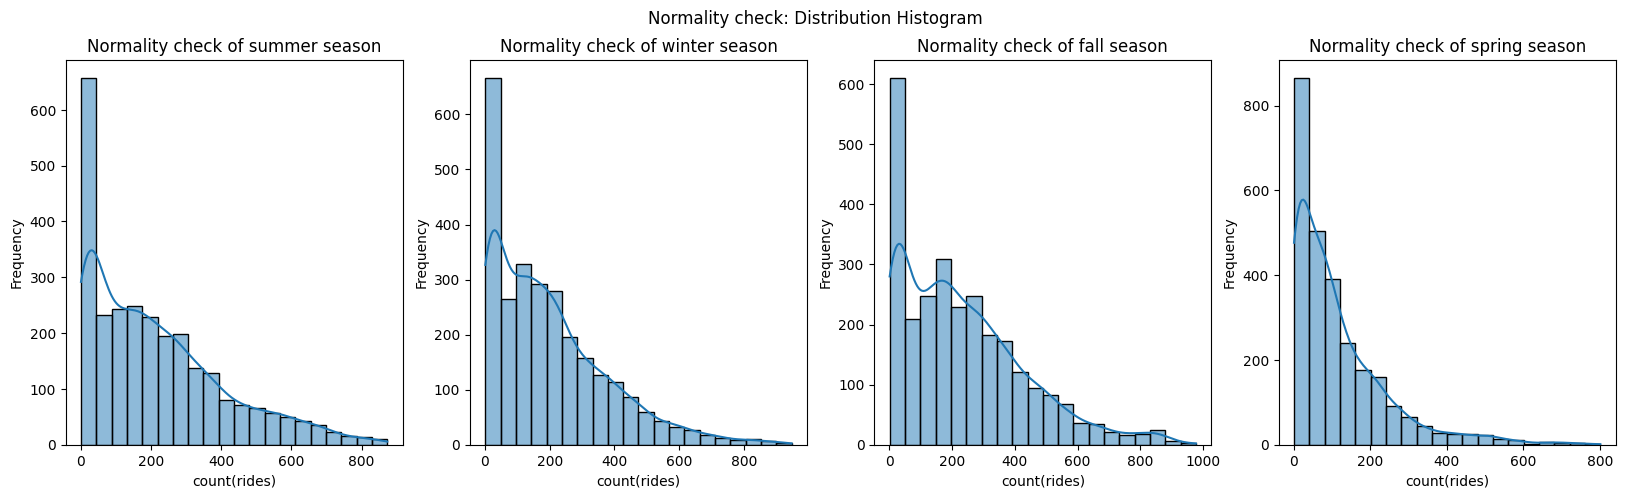

In [ ]:
se_cols = {'summer':summer , 'winter':winter , 'fall':fall, 'spring':spring}
plt.figure(figsize=(20,5))
plt.suptitle(f'Normality check: Distribution Histogram')
cou =1
for col,data in se_cols.items():
    plt.subplot(1,4,cou)
    sns.histplot(data, bins=20,kde=True)
    plt.ylabel('Frequency')
    plt.xlabel('count(rides)')
    plt.title(f"Normality check of {col} season")
    cou +=1
plt.show()

* #### **QQ Plot**

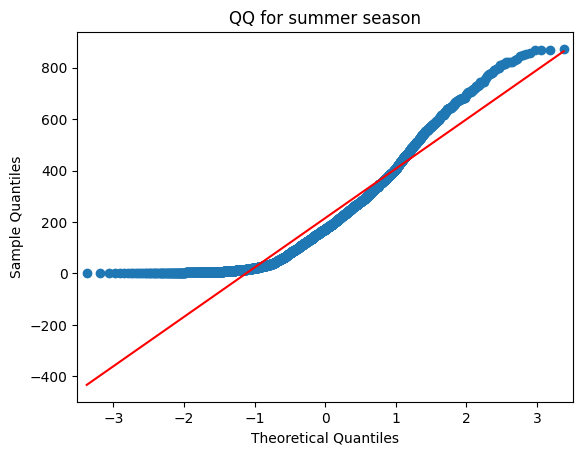

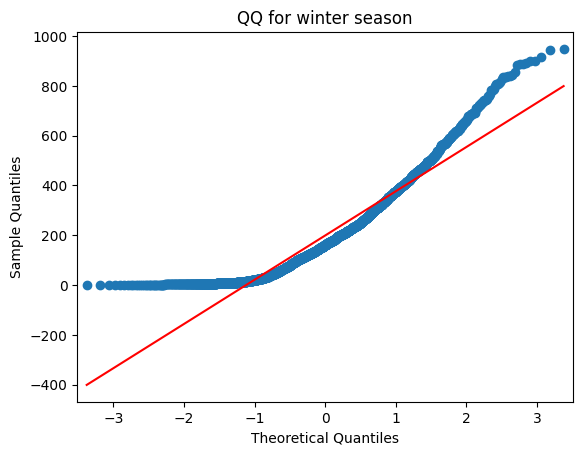

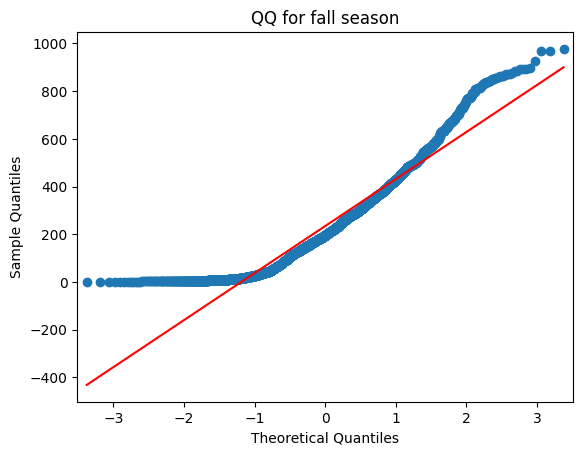

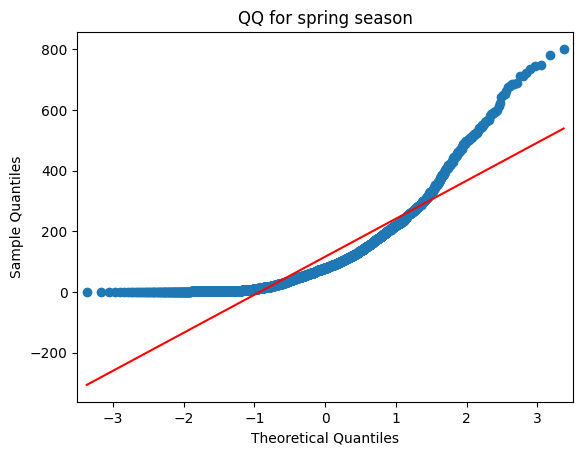

In [ ]:
se_cols = {'summer':summer , 'winter':winter , 'fall':fall, 'spring':spring}
cou =1
for col,data in se_cols.items():
  sm.qqplot(data,line='s')
  plt.title(f'QQ for {col} season')
  plt.show()
  cou +=1

**Key Observation**

* Data dose not fit on QQ - Plots also right skewed in histplot. Hence, can be concluded that data is not a normal distribution.

* For ANOVA, data need to follow normal distribution.


Can use BOX-COX transform to change the distribution of these groups to normal.

* #### **BOX-COX Transformation**

1.   List item
2.   List item



In [ ]:
summer_box , lam = boxcox(summer)
winter_box , lam = boxcox(winter)
fall_box , lam = boxcox(fall)
spring_box , lam = boxcox(spring)

* #### **Histogram** (Transformed Data)

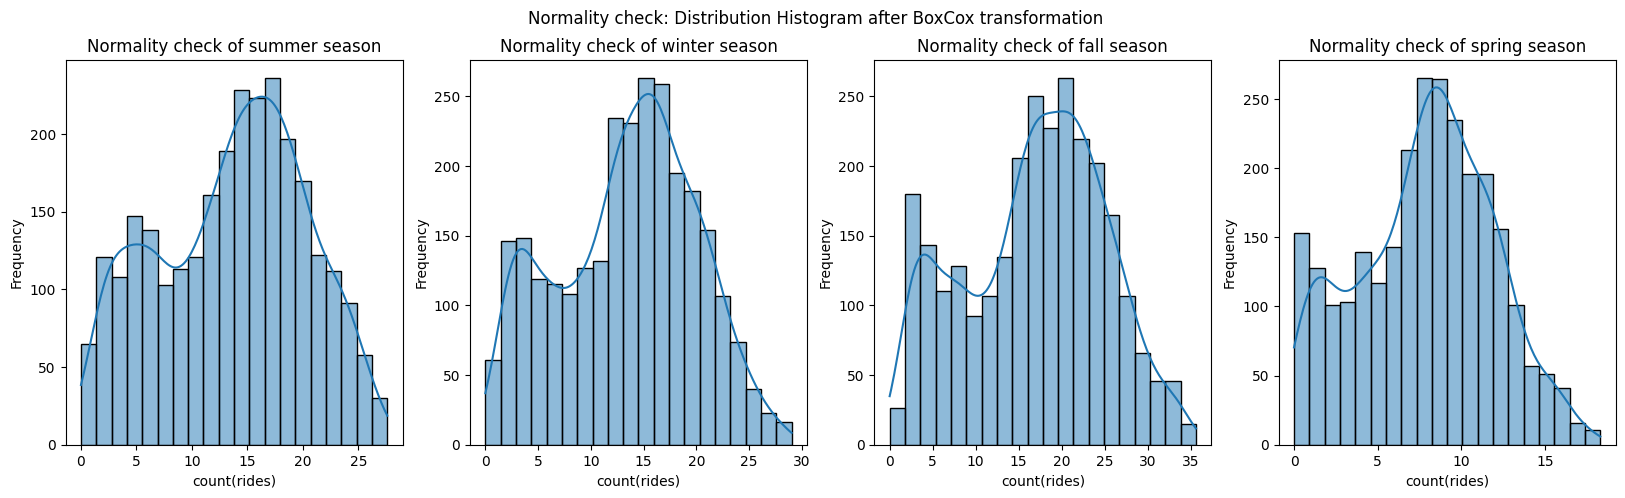

In [ ]:
se_cols = {'summer':summer_box , 'winter':winter_box , 'fall':fall_box, 'spring':spring_box}
plt.figure(figsize=(20,5))
plt.suptitle(f'Normality check: Distribution Histogram after BoxCox transformation')
cou =1
for col,data in se_cols.items():
    plt.subplot(1,4,cou)
    sns.histplot(data, bins=20,kde=True)
    plt.ylabel('Frequency')
    plt.xlabel('count(rides)')
    plt.title(f"Normality check of {col} season")
    cou +=1
plt.show()

* #### **QQ Plot**  (Transformed Data)

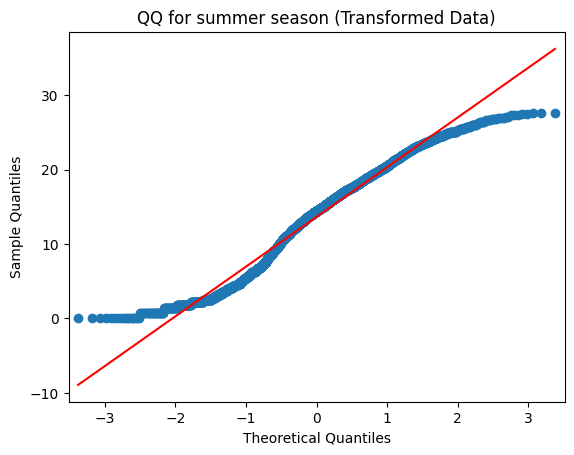

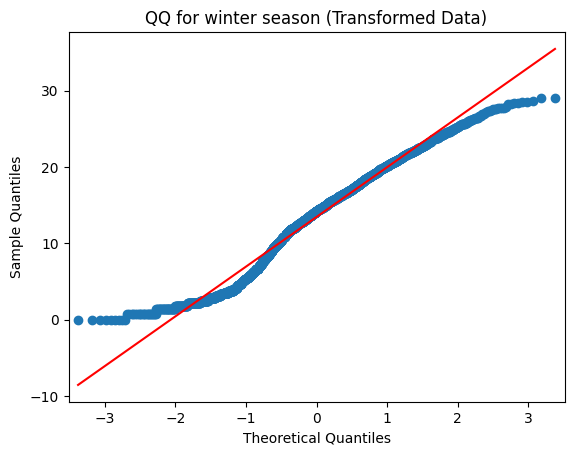

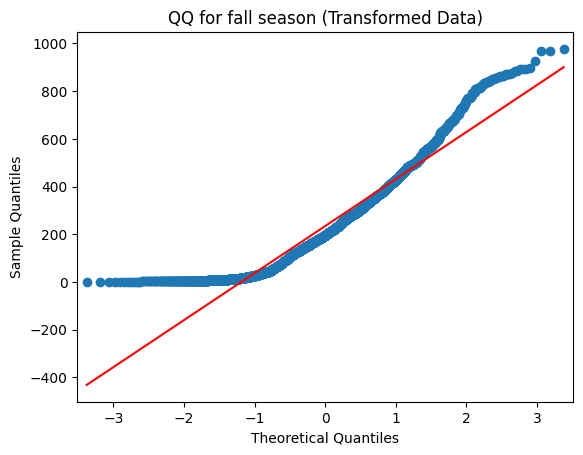

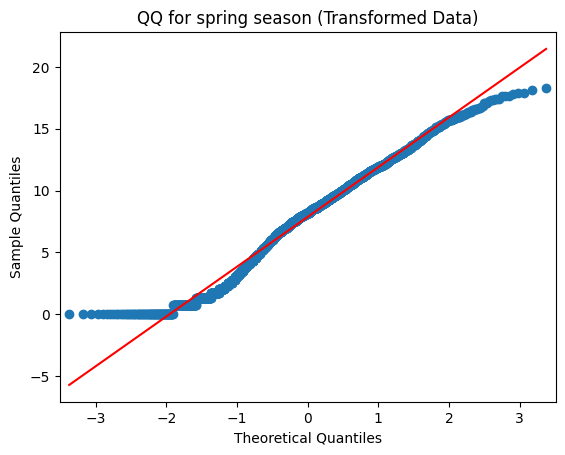

In [ ]:
se_cols = {'summer':summer_box , 'winter':winter_box , 'fall':fall, 'spring':spring_box}
cou =1
for col,data in se_cols.items():
  sm.qqplot(data,line='s')
  plt.title(f'QQ for {col} season (Transformed Data)')
  plt.show()
  cou +=1

* #### **Shapiro-Wilk Test:**

In [ ]:
# H0 Null Hypothesis - Data is normaly distributed
# Ha Alternate Hypothesis - Data is not normaly distributed

* Actual Data

In [ ]:
se_cols = {'summer':summer , 'winter':winter , 'fall':fall, 'spring':spring}
for col,data in se_cols.items():
  print(f'Check Normal Distribution of Data for Shapiro-Wilk Test for {col} data')
  print()
  shap_stat , p_val = shapiro(data)
  print(f"shapiro stat : {shap_stat}")
  print(f"p value : {p_val}")
  print()
  if p_val < 0.05:
    print(f'Data {col} is not Gaussian distribution')
    print()
  else:
    print(f'Data {col} is Gaussian distribution')
    print()
  print('-'*50)

Check Normal Distribution of Data for Shapiro-Wilk Test for summer data

shapiro stat : 0.900481641292572
p value : 6.039093315091269e-39

Data summer is not Gaussian distribution

--------------------------------------------------
Check Normal Distribution of Data for Shapiro-Wilk Test for winter data

shapiro stat : 0.8954644799232483
p value : 1.1301682309549298e-39

Data winter is not Gaussian distribution

--------------------------------------------------
Check Normal Distribution of Data for Shapiro-Wilk Test for fall data

shapiro stat : 0.9148160815238953
p value : 1.043458045587339e-36

Data fall is not Gaussian distribution

--------------------------------------------------
Check Normal Distribution of Data for Shapiro-Wilk Test for spring data

shapiro stat : 0.8087388873100281
p value : 0.0

Data spring is not Gaussian distribution

--------------------------------------------------


* Transfomered Data

In [ ]:
se_cols = {'summer':summer_box , 'winter':winter_box , 'fall':fall_box, 'spring':spring_box}
for col,data in se_cols.items():
  print(f'Check Normal Distribution of Data for Shapiro-Wilk Test for {col} data (transformed)')
  print()
  shap_stat , p_val = shapiro(data)
  print(f"shapiro stat : {shap_stat}")
  print(f"p value : {p_val}")
  print()
  if p_val < 0.05:
    print(f'Data {col} is not Gaussian distribution')
    print()
  else:
    print(f'Data {col} is Gaussian distribution')
    print()
  print('-'*50)

Check Normal Distribution of Data for Shapiro-Wilk Test for summer data (transformed)

shapiro stat : 0.9730892181396484
p value : 2.7910560207702335e-22

Data summer is not Gaussian distribution

--------------------------------------------------
Check Normal Distribution of Data for Shapiro-Wilk Test for winter data (transformed)

shapiro stat : 0.9763026833534241
p value : 6.342709865441161e-21

Data winter is not Gaussian distribution

--------------------------------------------------
Check Normal Distribution of Data for Shapiro-Wilk Test for fall data (transformed)

shapiro stat : 0.9733710289001465
p value : 3.6319999210910884e-22

Data fall is not Gaussian distribution

--------------------------------------------------
Check Normal Distribution of Data for Shapiro-Wilk Test for spring data (transformed)

shapiro stat : 0.9828581213951111
p value : 1.7082116755999925e-17

Data spring is not Gaussian distribution

--------------------------------------------------


* ### **Levene test for variance**

In [ ]:
#H0 Null Hypothesis: Homogenous Variance, Both Datas has similar variance

#Ha Alternate Hypothesis: Non Homogenous Variance, Both Datas has different variance

In [ ]:
lev_stat, p_value = levene(summer,winter,fall,spring)

print('Levene stat : ', lev_stat)
print('p-value : ', p_value)
print()
# Confidance level 95% alpha 5% = 0.05
if p_value < 0.05:
    print('Reject H0: The samples have different variance')
else:
    print('Fail to reject H0: The samples have similar variance')

Levene stat :  187.7706624026276
p-value :  1.0147116860043298e-118

Reject H0: The samples have different variance


**Key Observation:**

* Both **original data and the Boxcoxed data** doesn't follow the normal distribution,
* Anova  cannot perform. Kruskel-Walis H Test is more preferable test.

**STEP-3: Decide the kind of test.**

- More than two variable: Kruskel-Walis H Test and ANOVA


**STEP-4: Compute the p-value and fix value of alpha.**

- we will be computing the anova-test p-value using the f_oneway function using scipy.stats.
- Setting Alpha = 0.05 (i.e) Confidence Level = 95%

**STEP-6: Compare p-value and alpha.**


Based on p-value, we will accept or reject H0.
- p-value > alpha : Fail to Reject H0
- p-value < alpha : Reject H0

* ### **Kruskel-Walis H Test**

In [ ]:
#H0 Null Hypothesis: The mean of bikes rented is same for across seasons

#Ha Alternate Hypothesis:  The mean number of bikes rented is different across seasons

In [ ]:
KW_stat, p_value = kruskal(summer,winter,fall,spring)
print('KW Statistic =', KW_stat)
print('p value =', p_value)
print()
alpha = 0.05
if p_value < alpha:
    print('Reject H0: The mean number of bikes rented is different across seasons')
else:
    print('Failed to reject H0: The mean of bikes rented is same for across seasons')

KW Statistic = 699.6668548181915
p value = 2.4790083726176776e-151

Reject H0: The mean number of bikes rented is different across seasons


* ### **ANOVA**

In [ ]:
test = ols('count ~ C(season)',data=yu_data).fit()
sm.stats.anova_lm(test,typ=2)

sum_sq       df           F         PR(>F)
C(season)  2.190083e+07      3.0  236.946711  6.164843e-149
Residual   3.352721e+08  10882.0         NaN            NaN

In [ ]:
f_stat, p_value = f_oneway(summer,winter,fall,spring)
print('F Statistic =', f_stat)
print('p value =', p_value)
print()
if p_value < alpha:
    print('Reject H0: The mean number of bikes rented is different across seasons')
else:
    print('Failed to reject H0: The mean of bikes rented is same for across seasons')

F Statistic = 236.94671081032104
p value = 6.164843386499654e-149

Reject H0: The mean number of bikes rented is different across seasons


**Conclusion**
*  From both the Krukal-walis test & ANOVA test , it seems that the mean number of E-bikes rented differs across various Seasons.

-----

* ### **Checking is there No. of cycles rented similar or different in different weather?**

In [ ]:
yu_data.weather.value_counts()

weather
clear            7192
partly_cloudy    2834
rain              859
heavy_rain          1
Name: count, dtype: int64

- STEP-1 : Set up Null Hypothesis
- STEP-2 : Checking for basic assumptions for the hypothesis
- STEP-3 : Decide the kind of test.
- STEP-4: Compute the p-value and fix value of alpha.
- STEP-5: Compare p-value and alpha.


**STEP-1: Set up Null Hypothesis**

In [ ]:
# H0 Null Hypothesis :- The mean of bikes rented is same for across weather conditions.

# Ha Alternate Hypothesis : - The mean number of bikes rented is different across at least two weather conditions.

**STEP-2 : Checking for basic assumptions for the hypothesis**

Normality checks

* Distribution check using QQ Plot

Confirmation by Shapiro-wilks Test

Homogeneity of Variances using Levene's test

In [ ]:
yu_data.groupby('weather')['count'].describe()

count        mean         std    min    25%    50%    75%  \
weather                                                                     
clear          7192.0  205.236791  187.959566    1.0   48.0  161.0  305.0   
partly_cloudy  2834.0  178.955540  168.366413    1.0   41.0  134.0  264.0   
rain            859.0  118.846333  138.581297    1.0   23.0   71.0  161.0   
heavy_rain        1.0  164.000000         NaN  164.0  164.0  164.0  164.0   

                 max  
weather               
clear          977.0  
partly_cloudy  890.0  
rain           891.0  
heavy_rain     164.0

**Key Observation:**

* Only one entry for heavy rain days, hence not using in analysis

* #### **Histogram**

In [ ]:
clear = yu_data[yu_data['weather']=='clear']['count']
partly_cloudy = yu_data[yu_data['weather']=='partly_cloudy']['count']
rain = yu_data[yu_data['weather']=='rain']['count']
heavyrain = yu_data[yu_data['weather']=='heavy_rain']['count']

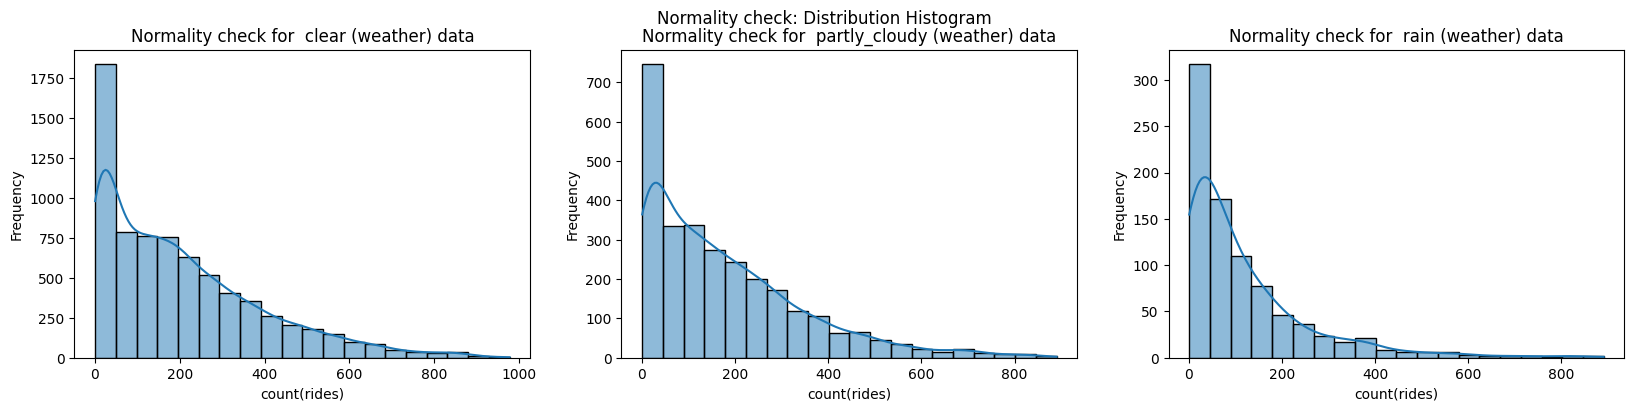

In [ ]:
se_cols = {'clear':clear , 'partly_cloudy':partly_cloudy , 'rain':rain}
plt.figure(figsize=(20,4))
plt.suptitle(f'Normality check: Distribution Histogram')
cou =1
for col,data in se_cols.items():
    plt.subplot(1,3,cou)
    sns.histplot(data, bins=20,kde=True)
    plt.ylabel('Frequency')
    plt.xlabel('count(rides)')
    plt.title(f"Normality check for  {col} (weather) data")
    cou +=1
plt.show()

* #### **QQ Plot**

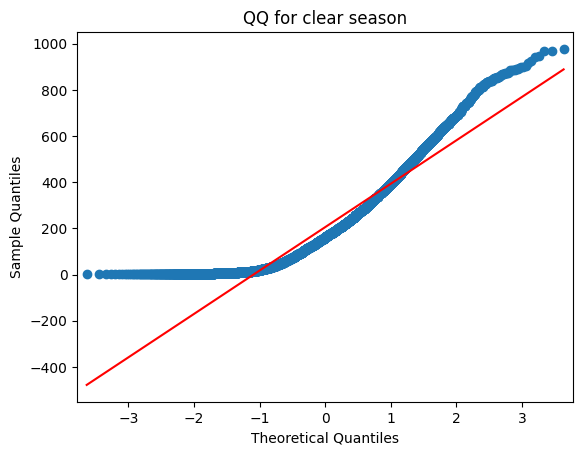

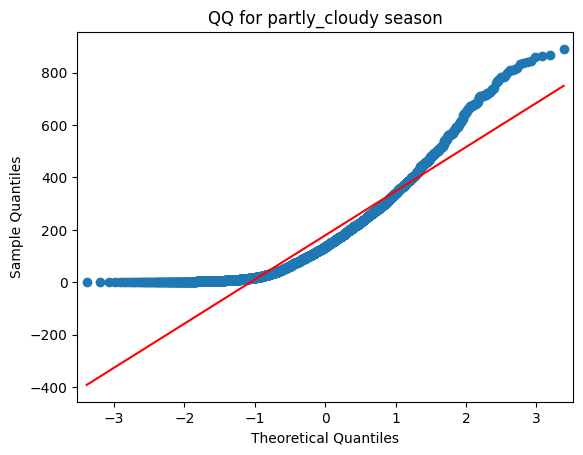

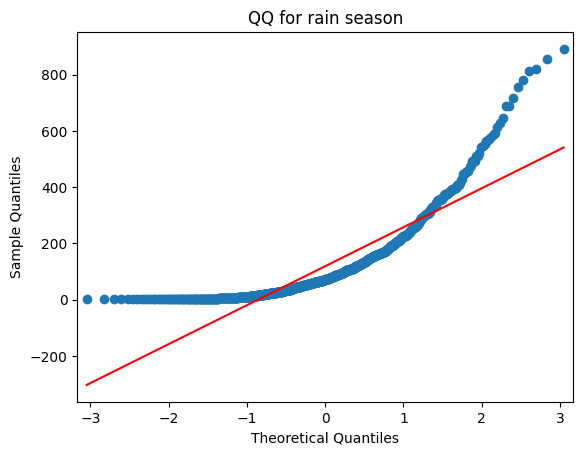

In [ ]:
se_cols = {'clear':clear , 'partly_cloudy':partly_cloudy , 'rain':rain}
cou =1
for col,data in se_cols.items():
  sm.qqplot(data,line='s')
  plt.title(f'QQ for {col} season')
  plt.show()
  cou +=1

**Key Observation**

* Data dose not fit on QQ - Plots also right skewed in histplot. Hence, can be concluded that data is not a normal distribution.

* For ANOVA, data need to follow normal distribution.


Can use BOX-COX transform to change the distribution of these groups to normal.

* #### **BOX-COX Transformation**

In [ ]:
clear_box , lam = boxcox(clear)
cloudy_box , lam = boxcox(partly_cloudy)
rain_box , lam = boxcox(rain)

* #### **Histogram** (Transformed Data)

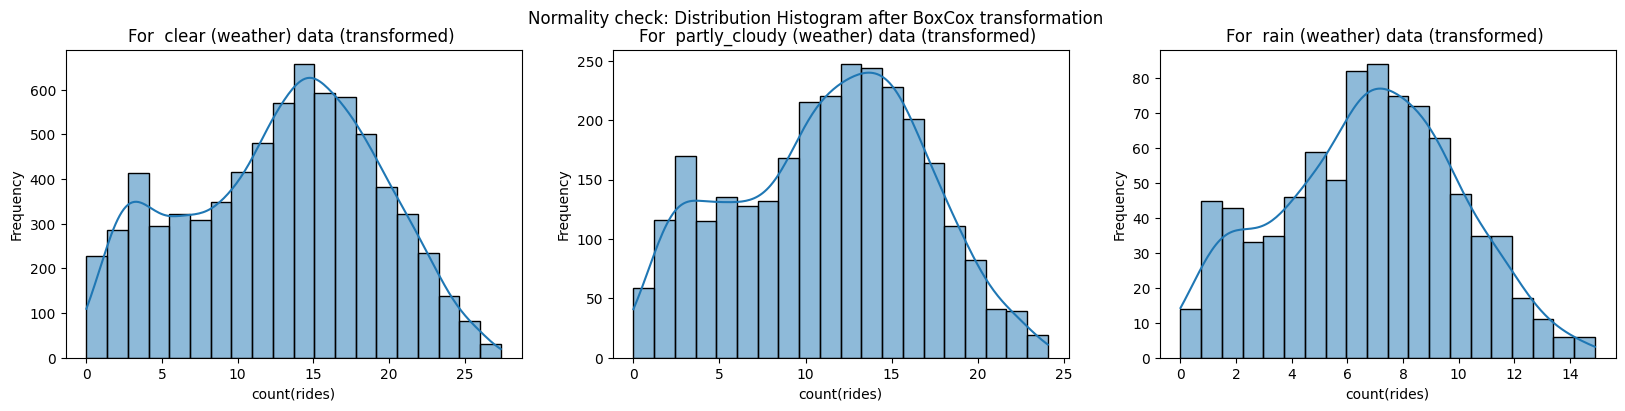

In [ ]:
se_cols = {'clear':clear_box , 'partly_cloudy':cloudy_box , 'rain':rain_box}
plt.figure(figsize=(20,4))
plt.suptitle(f'Normality check: Distribution Histogram after BoxCox transformation')
cou =1
for col,data in se_cols.items():
    plt.subplot(1,3,cou)
    sns.histplot(data, bins=20,kde=True)
    plt.ylabel('Frequency')
    plt.xlabel('count(rides)')
    plt.title(f"For  {col} (weather) data (transformed) ")
    cou +=1
plt.show()

* #### **QQ Plot**  (Transformed Data)

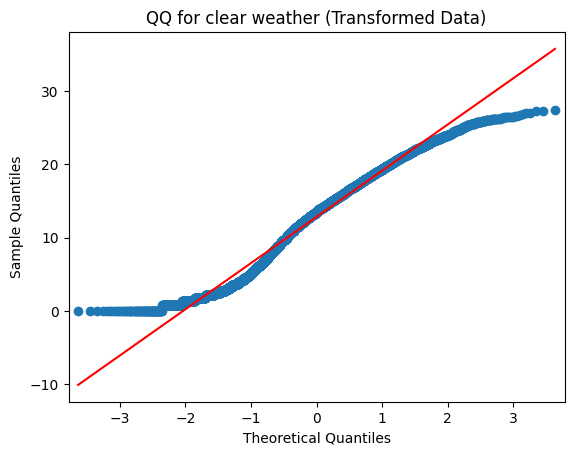

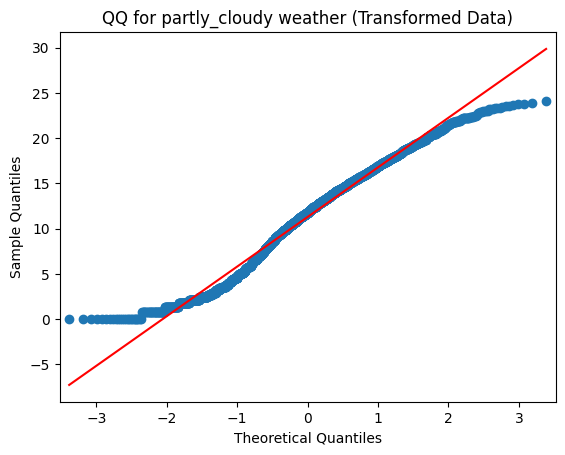

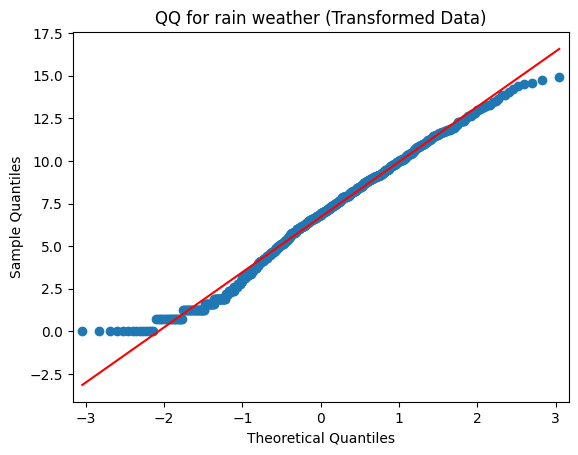

In [ ]:
se_cols = {'clear':clear_box , 'partly_cloudy':cloudy_box , 'rain':rain_box}
cou =1
for col,data in se_cols.items():
  sm.qqplot(data,line='s')
  plt.title(f'QQ for {col} weather (Transformed Data)')
  plt.show()
  cou +=1

* #### **Shapiro-Wilk Test:**

In [ ]:
# H0 Null Hypothesis - Data is normaly distributed
# Ha Alternate Hypothesis - Data is not normaly distributed

* Actual Data

In [ ]:
se_cols = {'clear':clear , 'partly_cloudy':partly_cloudy , 'rain':rain}
for col,data in se_cols.items():
  print(f'Check Normal Distribution of Data for Shapiro-Wilk Test for {col} (weather) data')
  print()
  shap_stat , p_val = shapiro(data)
  print(f"shapiro stat : {shap_stat}")
  print(f"p value : {p_val}")
  print()
  if p_val < 0.05:
    print(f'Data {col} (weather) is not Gaussian distribution')
    print()
  else:
    print(f'Data {col} (weather) is Gaussian distribution')
    print()
  print('-'*50)

Check Normal Distribution of Data for Shapiro-Wilk Test for clear (weather) data

shapiro stat : 0.8909230828285217
p value : 0.0

Data clear (weather) is not Gaussian distribution

--------------------------------------------------
Check Normal Distribution of Data for Shapiro-Wilk Test for partly_cloudy (weather) data

shapiro stat : 0.8767687082290649
p value : 9.781063280987223e-43

Data partly_cloudy (weather) is not Gaussian distribution

--------------------------------------------------
Check Normal Distribution of Data for Shapiro-Wilk Test for rain (weather) data

shapiro stat : 0.7674332857131958
p value : 3.876090133422781e-33

Data rain (weather) is not Gaussian distribution

--------------------------------------------------


* Transfomered Data

In [ ]:
se_cols = {'clear':clear_box , 'partly_cloudy':cloudy_box , 'rain':rain_box}
for col,data in se_cols.items():
  print(f'Check Normal Distribution of Data for Shapiro-Wilk Test for {col} (weather) data (Transfomered)')
  print()
  shap_stat , p_val = shapiro(data)
  print(f"shapiro stat : {shap_stat}")
  print(f"p value : {p_val}")
  print()
  if p_val < 0.05:
    print(f'Data {col} (weather) is not Gaussian distribution')
    print()
  else:
    print(f'Data {col}(weather) is Gaussian distribution')
    print()
  print('-'*50)

Check Normal Distribution of Data for Shapiro-Wilk Test for clear (weather) data (Transfomered)

shapiro stat : 0.9771609306335449
p value : 2.061217589223373e-32

Data clear (weather) is not Gaussian distribution

--------------------------------------------------
Check Normal Distribution of Data for Shapiro-Wilk Test for partly_cloudy (weather) data (Transfomered)

shapiro stat : 0.9802151918411255
p value : 1.9216098393369846e-19

Data partly_cloudy (weather) is not Gaussian distribution

--------------------------------------------------
Check Normal Distribution of Data for Shapiro-Wilk Test for rain (weather) data (Transfomered)

shapiro stat : 0.9877902269363403
p value : 1.4133181593933841e-06

Data rain (weather) is not Gaussian distribution

--------------------------------------------------


* ### **Levene test for variance**

In [ ]:
#H0 Null Hypothesis: Homogenous Variance, Both Datas has similar variance

#Ha Alternate Hypothesis: Non Homogenous Variance, Both Datas has different variance

In [ ]:
lev_stat, p_value = levene(clear ,partly_cloudy , rain)

print('Levene stat : ', lev_stat)
print('p-value : ', p_value)
print()
# Confidance level 95% alpha 5% = 0.05
if p_value < 0.05:
    print('Reject H0: The samples have different variance')
else:
    print('Fail to reject H0: The samples have similar variance')

Levene stat :  81.67574924435011
p-value :  6.198278710731511e-36

Reject H0: The samples have different variance


**Key Observation:**

* Both **original data and the Boxcoxed data** doesn't follow the normal distribution,
* Anova  cannot perform. Kruskel-Walis H Test is more preferable test.

**STEP-3: Decide the kind of test.**

- More than two variable: Kruskel-Walis H Test and ANOVA


**STEP-4: Compute the p-value and fix value of alpha.**

- we will be computing the anova-test p-value using the f_oneway function using scipy.stats.
- Setting Alpha = 0.05 (i.e) Confidence Level = 95%


**STEP-5: Compare p-value and alpha.**


Based on p-value, we will accept or reject H0.
- p-value > alpha : Fail to Reject H0
- p-value < alpha : Reject H0

* ### **Kruskel-Walis H Test**

In [ ]:
#H0 Null Hypothesis: The mean of bikes rented is same for across seasons

#Ha Alternate Hypothesis:  The mean number of bikes rented is different across at weather conditions

In [ ]:
KW_stat, p_value = kruskal(clear,partly_cloudy,rain)
print('KW Statistic =', KW_stat)
print('p value =', p_value)
print()
alpha = 0.05
if p_value < alpha:
    print('Reject H0: The mean number of bikes rented is different across at weather conditions')
else:
    print('Failed to reject H0: The mean of bikes rented is same for across weather conditions')

KW Statistic = 204.95566833068537
p value = 3.122066178659941e-45

Reject H0: The mean number of bikes rented is different across at weather conditions


* ### **ANOVA**

In [ ]:
test = ols('count ~ C(weather)',data=yu_data).fit()
sm.stats.anova_lm(test,typ=2)

sum_sq       df          F        PR(>F)
C(weather)  6.338070e+06      3.0  65.530241  5.482069e-42
Residual    3.508348e+08  10882.0        NaN           NaN

In [ ]:
f_stat, p_value = f_oneway(summer,winter,fall,spring)
print('F Statistic =', f_stat)
print('p value =', p_value)
print()
if p_value < alpha:
  print('Reject H0: The mean number of bikes rented is different across at weather conditions')
else:
  print('Failed to reject H0: The mean of bikes rented is same for across weather conditions')

F Statistic = 236.94671081032104
p value = 6.164843386499654e-149

Reject H0: The mean number of bikes rented is different across at weather conditions


**Conclusion:**

* From both the Krukal-walis test & ANOVA test, it can be concluded that the mean number of E-bikes rented differs across various weather conditions.

-----

* ## **Checking if Weather is dependent on season**  
###(check between 2 predictor variable)

- STEP-1 : Set up Null Hypothesis
- STEP-2 : Checking for basic assumptions for the hypothesis
- STEP-3 : Decide the kind of test.
- STEP-4: Compute the p-value and fix value of alpha.
- STEP-5: Compare p-value and alpha.

**STEP-1 : Set up Null Hypothesis**

In [ ]:
# H0 Null Hypothesis - weather is independent of season

# Ha Alternate Hypothesis - weather is dependent of seasons.

**STEP-2: Checking for basic assumptions for the hypothesis**
- 2 variables, measured as categories.
- Category vs Catagory analysis
- Both variables/category data in the cells should be absolute values like counts of cases. can be done using crosstab
- Both variable are mutualy exclusive.

In [ ]:
we_se = pd.crosstab(yu_data['weather'],yu_data['season'])
we_se

season         spring  summer  fall  winter
weather                                    
clear            1759    1801  1930    1702
partly_cloudy     715     708   604     807
rain              211     224   199     225
heavy_rain          1       0     0       0

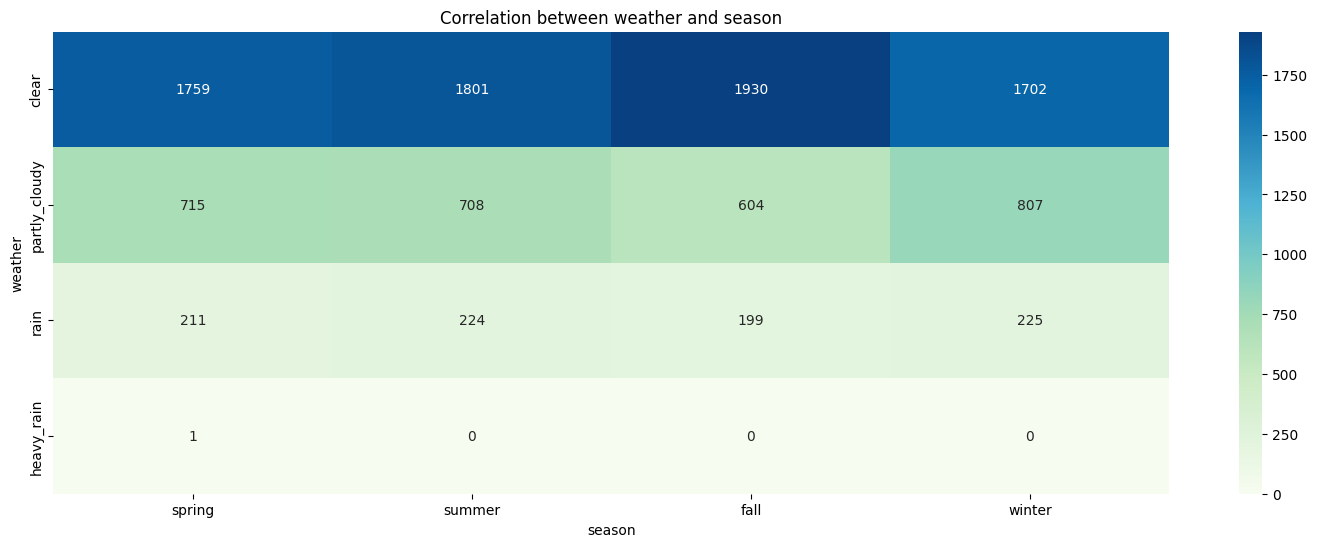

In [ ]:
plt.figure(figsize=(18,6))
sns.heatmap(we_se, annot=True, fmt='.6g',cmap='GnBu')
plt.title('Correlation between weather and season')
plt.show()

**STEP-3: Decide the kind of test.**
- Categorical vs categorical Analysis , further checking independance
- the chisquare Test of independence will be most sutaible test (i.e) chi2_contingency

**STEP-4: Compute the p-value and fix value of alpha.**

- computing the chi square-test p-value using the chi 2 function using scipy.stats. We set our **alpha to be 0.05**
- Setting Alpha = 0.05 (i.e) Confidence Level = 95%


**STEP-5: Compare p-value and alpha.**


Based on p-value, we will accept or reject H0.
- p-value > alpha : Fail to Reject H0
- p-value < alpha : Reject H0

* ### **Chi-square Test of independence**  

removing the heavy rain valuue since, it is only one value.

In [ ]:
obs_v = np.array([we_se.iloc[0][:].values ,we_se.iloc[1][:].values ,we_se.iloc[2][:].values])
obs_v

array([[1759, 1801, 1930, 1702],
       [ 715,  708,  604,  807],
       [ 211,  224,  199,  225]])

In [ ]:
chi_stat , p_value , dof , expd = chi2_contingency(obs_v)

print("Chi-square stat : ",chi_stat)
print("p_value : ",p_value)
print("Dof : ",dof)
print()
print("Expected : ",expd.round(0))
print("Observed : ",obs_v)
print()
alpha = 0.05
if p_value< alpha:
    print("Reject Ho: Weather is dependent on season")
else:
    print("Fail to Reject Ho: Weather is independent on season")

Chi-square stat :  46.101457310732485
p_value :  2.8260014509929403e-08
Dof :  6

Expected :  [[1774. 1806. 1806. 1806.]
 [ 699.  712.  712.  712.]
 [ 212.  216.  216.  216.]]
Observed :  [[1759 1801 1930 1702]
 [ 715  708  604  807]
 [ 211  224  199  225]]

Reject Ho: Weather is dependent on season


**Conclusion**

- From the results of  chisquare test of independence, it be confirm that Weather is dependent on Various seasons.

----

---
##**Observations and Insights**


- The data period is 2011-01-01 to 2012-12-19. The total time period '718 days 23:00:00'.

- Around 19% are casual users and 81% are registered users.
- The hourly rental count shows impressive annual growth from 2011 to 2012. The growth(mean) is about ~65%.

- Almost all seasons having similar bike rentals, however slightly high number of bikes during summer, while slightly less is springs.

- No of rental bikes are also most similar in each month, however slightly lowest in the January.

- Clear weather is associated with the highest bike rental counts, whereas rentals sharply decrease in rain, thunderstorm, snow, or fog.

- The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

- Less rentals on holidays and weekends, with a demand increase on non-working days. However, the overall count on working and non-holiday days are similar.

- Lower temperatures correspond to lower bike rentals, and demand rises with increasing temperatures.

- More than 75 % of the time, the temperature is less than 26 degrees celcius.

- Most the humidity level is range of 47 to 77. Humidity level varies from optimum to too moist.

- Humidity, windspeed, temperature and weather are correlated with season and impacts the count of rented bikes.

- Temperature and real feel temperature show a strong positive correlation.

- Registered Users and Count(Total_riders) shows a strong positive correlation.

- Limited correlation observed between weather-related factors and bike rental counts.

- Krukal-walis test & ANOVA test concluded that the mean number of E-bikes rented differs across various Seasons and also the mean number of E-bikes rented differs across various weather conditions.
- 2-sample t-test and Mann Whitney-u-Rank concluded that Mean No. of bikes rented is same for working and non-working days.
- ChiSquare concluded that the Weather is dependent on the Seasons.

-----------------


## **Business Recommendations**

**Marketing**:
* **Seasonal**  
  - There is a seasonal pattern in the count of rental bikes, Yulu can target marketing strategies & promotional activities during the spring and summer months when there is higher demand. Give offer discounts to increase more customers during these periods.
  - And offer seasonal discounts or special packages for winters to increase customers engagement during these periods.

* **Social Media**:
  - Social media campaigns for strategic promotions and engagement like share selfie or experience with Yulu campaign for incentive like 1km extra ride.
  - Yulu can also market by using diverse biking experiences, customer testimonials, and run targeted advertising campaigns.

**Time-based Pricing**:
- Yulu can optimize resource utilization by implementing dynamic time-based pricing, to address hourly fluctuation in bike rental counts throughout the day.
- Yulu may adjust rental rates to encourage bike usage during off-peak hours, enhancing accessibility.

**Weather-based Promotions**:
- Considering the impact of weather on bike rentals. Yulu may create weather-based promotions focusing on clear and cloudy weather (highest rental counts).
- Yulu can offer weather-specific discounts to attract more customers during favourable weather conditions.

**User focused Promotions**:
- As 81% of users are registered, and 19% are casual, Yulu can provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business.
- For casual users Yulu can focus on providing a better rental experience, and better membership offer to first time users and promoting the benefits of bike rentals for occasional use.

**Weather Data Collection**:
- Almost no records for heavy rain /extreme weather conditions, difficult to draw inference, Yulu may use better data collection process.
- Yulu can consider specialized bike models or safety measures for different weather scenarios to increase user confidence, if data lack is because of the malfunction during the extreme weather .

**Optimize Inventory**:
- Inventory can be optimized on monthly demand bases to avoid excess bikes during low-demand months and ensure sufficient bikes during peak periods.


**Customer Comfort**:
- Humidity levels are high and temperature is often below 26 degrees Celsius, Yulu may consider providing amenities like poly coat/rain coat, or water facility for bike users through app.
- This will improve overall biking experience, contributing to enhance comfort and convenience of the customers and will positive customer feedback.

**Feedback and Reviews**:
- Encourage users to provide feedback and reviews on their biking experience.
- Feedback will help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

**Integration with Weather Report Services**:
- Yulu can consider integration of weather services to provide real-time weather updates and weather forecasts to customers or potential customer to improve experience.
- Also to use weather information for marketing or rental app to showcase ideal biking conditions and attract users who preferred weather conditions.

**Maintenance**:
- Yulu to consider regularly track and measure bike performance and maintenance on the basis on battery and bike use data
- Yulu to also consider seasonal bike maintenance specially before the peak seasons.
- Regular inspection based on registration and bike use location data to ensure good state of Yulu bike stations and maximize customer satisfaction.


-------------------------

Thanks

Tushar Shrivastav
